<a href="https://colab.research.google.com/github/NicoBraun93/BeeBrain_Unet/blob/master/3D_BeeBrain_CNN_er_lernt!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Transformation Functions -> outsource in Classfile later
from skimage.transform import rotate
from skimage import io
import matplotlib.pyplot as plt
from numpy import transpose
from random import randint, sample,seed, random
import numpy as np
from PIL import Image
#torchvision.transforms.RandomRotation(degrees, resample=False, expand=False, center=None, fill=None)
#torchvision.transforms.RandomHorizontalFlip(p=0.5)

# transformation with np.flip

def rotate3D(image, degreeX=0, degreeY=0, resize = True):
    stack = list()
    stack2 = list()
    if degreeX != 0:
        for i in image:
            i = Image.fromarray(np.uint16(i))
            i = i.rotate(degreeX)
            i = np.array(i)
            stack.append(i)
    else: stack = image

    if degreeY != 0:
        stack = transpose(stack)
        for i in stack: 
            i = Image.fromarray(np.uint16(i))
            i = i.rotate(degreeY)
            i = np.array(i)
            stack2.append(i)
        stack = transpose(stack2)
            
    else: stack2 = stack
    return stack2

def random_rotate3D_90(image,InnerSeed, p=0.5, resize = True):
    #seed(InnerSeed/2)
    if randint(1,100) < p*100:

        stack = list()
        stack2 = list()

        degreeX = sample((90,0,-90),1)[0]
        degreeY = sample((90,0,-90),1)[0]

        if degreeX != 0:
            for i in image:
                i = Image.fromarray(np.uint16(i))
                i = i.rotate(degreeX)
                i = np.array(i)
                stack.append(i)
        else: stack = image

        if degreeY != 0:
            stack = transpose(stack)
            for i in stack: 
                i = Image.fromarray(np.uint16(i))
                i = i.rotate(degreeY)
                i = np.array(i)
                stack2.append(i)
            stack = transpose(stack2)
                
        else: stack2 = stack
        return np.array(stack2)
    else:
        return(image)

def random_rotate3D_1830(image,InnerSeed, p=0.5, resize = True):
    seed(InnerSeed/3)
    print("seed: ", InnerSeed)
    print("random: ", randint(1,100))
    if randint(1,100) < p*100:

        stack = list()
        stack2 = list()

        degreeX = sample((180,0),1)[0]
        degreeY = sample((180,0),1)[0]

        if degreeX != 0:
            for i in image:
                i = Image.fromarray(np.uint16(i))
                i = i.rotate(degreeX)
                i = np.array(i)
                stack.append(i)
        else: stack = image

        if degreeY != 0:
            stack = transpose(stack)
            for i in stack: 
                i = Image.fromarray(np.uint16(i))
                i = i.rotate(degreeY)
                i = np.array(i)
                stack2.append(i)
            stack = transpose(stack2)
                
        else: stack2 = stack
        #print(np.array(stack2).shape)
        return np.array(stack2)
    else:
        #print(image.shape)
        return(image)


def random_rotate3D_flip(image,InnerSeed, p=0.5, resize = True):
    seed(InnerSeed/3)
    if randint(1,100) < p*100:


        degreeX = sample((180,0),1)[0]
        #print("X", degreeX)
        degreeY = sample((180,0),1)[0]
        #print("Y", degreeY)
        degreeZ = sample((180,0),1)[0]
        #print("Z", degreeZ)

        if degreeX != 0:
            image = np.flip(image, axis=-1)

        if degreeY != 0:
            image = np.flip(image, axis=-2)
                
        if degreeZ != 0:
            image = np.flip(image, axis=-3)
        return image
    else:
        return(image)

def random_rotate3D_transpose(image,InnerSeed, p=0.5, resize = True):
    seed(InnerSeed/2)
    if randint(1,100) < p*100:


        degreeX = sample((180,0),1)[0]
        #print("Xt", degreeX)
        degreeY = sample((180,0),1)[0]
        #print("Yt", degreeY)
        degreeZ = sample((180,0),1)[0]
        #print("Zt", degreeZ)

        if degreeX != 0:
            image = np.transpose(image, (0,2,1))

        if degreeY != 0:
            image = np.transpose(image, (1,0,2))
                
        if degreeZ != 0:
            image = np.transpose(image, (2,1,0))
        return image
    else:
        return(image)

def random_noise(image,  p=0.5):
    noise_intensity = random()/2
    if randint(1,100) < p*100:

        image = image+ torch.rand(image.shape)*noise_intensity
        return image
    else:
        return(image)



In [ ]:
# hopefully 3d unet

from collections import OrderedDict

import torch
import torch.nn as nn
from math import floor

class testNet(nn.Module):
    def __init__(self):
        super(testNet,self).__init__()
        self.conv1 = nn.Conv3d(in_channels=1,out_channels=8,kernel_size=3,padding=1)
        self.conv2 = nn.Conv3d(in_channels=8,out_channels=16,kernel_size=3,padding=1)
        self.conv3 = nn.Conv3d(in_channels=16,out_channels=16,kernel_size=3,padding=1)
        self.conv4 = nn.Conv3d(in_channels=16,out_channels=10,kernel_size=3,padding=1)
        self.selu = nn.SELU()

    def forward(self,x):
        x = self.conv1(x)
        x = self.selu(x)
        x = self.conv2(x)
        x = self.selu(x)
        x = self.conv3(x)
        x = self.selu(x)
        x = self.conv4(x)
        return (self.selu(x))

class UNet(nn.Module):

    #def __init__(self, in_channels=1, out_channels=2, init_features=8): # für nur 2 classen variante
    def __init__(self, in_channels=1, out_channels=10, init_features=16):
        super(UNet, self).__init__()

        features = init_features
        self.encoder1 = UNet._block(in_channels, features, name="enc1")
        self.pool1 = nn.MaxPool3d(kernel_size=2, stride=2, ceil_mode=True)
        self.encoder2 = UNet._block(features, features * 2, name="enc2")
        self.pool2 = nn.MaxPool3d(kernel_size=2, stride=2)
        self.encoder3 = UNet._block(features * 2, features * 4, name="enc3")
        self.pool3 = nn.MaxPool3d(kernel_size=2, stride=2)
        self.encoder4 = UNet._block(features * 4, features * 8, name="enc4")
        self.pool4 = nn.MaxPool3d(kernel_size=2, stride=2)
        self.encoder5 = UNet._block(features * 8, features * 16, name="enc5")
        self.pool5 = nn.MaxPool3d(kernel_size=2, stride=2)
        #self.encoder6 = UNet._block(features * 16, features * 32, name="enc4")
        #self.pool6 = nn.MaxPool3d(kernel_size=2, stride=2)
        

        self.bottleneck = UNet._block(features * 16, features * 32, name="bottleneck")  

        #self.upconv6 = nn.ConvTranspose3d(
        #    features * 64, features * 32, kernel_size=2, stride=2                     
        #)
        #self.decoder6 = UNet._block((features * 32) * 2, features * 32, name="dec3") 
        self.upconv5 = nn.ConvTranspose3d(
            features * 32, features * 16, kernel_size=2, stride=2                     
        )
        self.decoder5 = UNet._block((features * 16) * 2, features * 16, name="dec5")
        self.upconv4 = nn.ConvTranspose3d(
            features * 16, features * 8, kernel_size=2, stride=2
        )                                                                                  
        self.decoder4 = UNet._block((features * 8) * 2, features * 8, name="dec4")      
        self.upconv3 = nn.ConvTranspose3d(
            features * 8, features * 4, kernel_size=2, stride=2                     
        )
        self.decoder3 = UNet._block((features * 4) * 2, features * 4, name="dec3")
        self.upconv2 = nn.ConvTranspose3d(
            features * 4, features * 2, kernel_size=2, stride=2
        )
        self.decoder2 = UNet._block((features * 2) * 2, features * 2, name="dec2")
        self.upconv1 = nn.ConvTranspose3d(
            features * 2, features, kernel_size=2, stride=2
        )
        self.decoder1 = UNet._block(features * 2, features, name="dec1")
        

        self.conv = nn.Conv3d(
            in_channels=features, out_channels=out_channels, kernel_size=1
        )

        self.dropout = nn.Dropout()


    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool1(enc1))
        enc3 = self.encoder3(self.pool2(enc2))
        enc4 = self.encoder4(self.pool3(enc3))
        enc5 = self.encoder5(self.pool4(enc4))
        #enc6 = self.encoder6(self.pool5(enc5))
      

        bottleneck = self.bottleneck(self.pool5(enc5))
        bottleneck = self.dropout(bottleneck)

        #dec6 = self.upconv6(bottleneck)
        #dec6 = torch.cat((dec6, enc6), dim=1)
        #dec6 = self.decoder6(dec6)

        dec5 = self.upconv5(bottleneck)
        dec5 = torch.cat((dec5,enc5), dim=1)
        dec5 = self.decoder5(dec5)

        dec4 = self.upconv4(dec5)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.decoder4(dec4)

        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1) 
        dec3 = self.decoder3(dec3)

        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.decoder2(dec2)

        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.decoder1(dec1)

        return (self.conv(dec1))

    @staticmethod
    def _block(in_channels, features, name):
        return nn.Sequential(
            OrderedDict(
                [
                    (
                        name + "conv1",
                        nn.Conv3d(
                            in_channels=in_channels,
                            out_channels=features,
                            kernel_size=3,
                            padding=1,
                            bias=False,
                        ),
                    ),
                    (name + "norm1", nn.BatchNorm3d(num_features=features)),
                    (name + "relu1", nn.SELU(inplace=True)),
                    (
                        name + "conv2",
                        nn.Conv3d(
                            in_channels=features,
                            out_channels=features,
                            kernel_size=3,
                            padding=1,
                            bias=False,
                        ),
                    ),
                    (name + "norm2", nn.BatchNorm3d(num_features=features)),
                    (name + "relu2", nn.SELU(inplace=True)),
                ]
            )
        )

In [ ]:
class UNet_2class(nn.Module):

    #def __init__(self, in_channels=1, out_channels=2, init_features=8): # für nur 2 classen variante
    def __init__(self, in_channels=1, out_channels=2, init_features=16):
        super(UNet_2class, self).__init__()

        features = init_features
        self.encoder1 = UNet._block(in_channels, features, name="enc1")
        self.pool1 = nn.MaxPool3d(kernel_size=2, stride=2, ceil_mode=True)
        self.encoder2 = UNet._block(features, features * 2, name="enc2")
        self.pool2 = nn.MaxPool3d(kernel_size=2, stride=2)
        self.encoder3 = UNet._block(features * 2, features * 4, name="enc3")
        self.pool3 = nn.MaxPool3d(kernel_size=2, stride=2)
        self.encoder4 = UNet._block(features * 4, features * 8, name="enc4")
        self.pool4 = nn.MaxPool3d(kernel_size=2, stride=2)
        self.encoder5 = UNet._block(features * 8, features * 16, name="enc5")
        self.pool5 = nn.MaxPool3d(kernel_size=2, stride=2)
        #self.encoder6 = UNet._block(features * 16, features * 32, name="enc4")
        #self.pool6 = nn.MaxPool3d(kernel_size=2, stride=2)
        

        self.bottleneck = UNet._block(features * 16, features * 32, name="bottleneck")  

        #self.upconv6 = nn.ConvTranspose3d(
        #    features * 64, features * 32, kernel_size=2, stride=2                     
        #)
        #self.decoder6 = UNet._block((features * 32) * 2, features * 32, name="dec3") 
        self.upconv5 = nn.ConvTranspose3d(
            features * 32, features * 16, kernel_size=2, stride=2                     
        )
        self.decoder5 = UNet._block((features * 16) * 2, features * 16, name="dec5")
        self.upconv4 = nn.ConvTranspose3d(
            features * 16, features * 8, kernel_size=2, stride=2
        )                                                                                  
        self.decoder4 = UNet._block((features * 8) * 2, features * 8, name="dec4")      
        self.upconv3 = nn.ConvTranspose3d(
            features * 8, features * 4, kernel_size=2, stride=2                     
        )
        self.decoder3 = UNet._block((features * 4) * 2, features * 4, name="dec3")
        self.upconv2 = nn.ConvTranspose3d(
            features * 4, features * 2, kernel_size=2, stride=2
        )
        self.decoder2 = UNet._block((features * 2) * 2, features * 2, name="dec2")
        self.upconv1 = nn.ConvTranspose3d(
            features * 2, features, kernel_size=2, stride=2
        )
        self.decoder1 = UNet._block(features * 2, features, name="dec1")
        

        self.conv = nn.Conv3d(
            in_channels=features, out_channels=out_channels, kernel_size=1
        )

        self.dropout = nn.Dropout()


    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool1(enc1))
        enc3 = self.encoder3(self.pool2(enc2))
        enc4 = self.encoder4(self.pool3(enc3))
        enc5 = self.encoder5(self.pool4(enc4))
        #enc6 = self.encoder6(self.pool5(enc5))
      

        bottleneck = self.bottleneck(self.pool5(enc5))
        bottleneck = self.dropout(bottleneck)

        #dec6 = self.upconv6(bottleneck)
        #dec6 = torch.cat((dec6, enc6), dim=1)
        #dec6 = self.decoder6(dec6)

        dec5 = self.upconv5(bottleneck)
        dec5 = torch.cat((dec5,enc5), dim=1)
        dec5 = self.decoder5(dec5)

        dec4 = self.upconv4(dec5)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.decoder4(dec4)

        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1) 
        dec3 = self.decoder3(dec3)

        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.decoder2(dec2)

        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.decoder1(dec1)

        return (self.conv(dec1))

    @staticmethod
    def _block(in_channels, features, name):
        return nn.Sequential(
            OrderedDict(
                [
                    (
                        name + "conv1",
                        nn.Conv3d(
                            in_channels=in_channels,
                            out_channels=features,
                            kernel_size=3,
                            padding=1,
                            bias=False,
                        ),
                    ),
                    (name + "norm1", nn.BatchNorm3d(num_features=features)),
                    (name + "relu1", nn.SELU(inplace=True)),
                    (
                        name + "conv2",
                        nn.Conv3d(
                            in_channels=features,
                            out_channels=features,
                            kernel_size=3,
                            padding=1,
                            bias=False,
                        ),
                    ),
                    (name + "norm2", nn.BatchNorm3d(num_features=features)),
                    (name + "relu2", nn.SELU(inplace=True)),
                ]
            )
        )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
import torchvision.datasets


In [ ]:
#Initializing the Object for CNN
#model = UNet()
model = UNet_2class()
#model = testNet()

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda") 
    torch.cuda.init()
else:
    device = torch.device("cpu")
#device = torch.device("cpu")
model.to(device)
print("")


In [ ]:
import numpy as np
from torch.utils.data import Dataset
import os
from skimage import io
from skimage.color import rgb2gray
from random import seed,randint

class BeeDataset(Dataset):

    def __init__(self, source_dir:str, transform, channel=0):
        self.source_dir = source_dir
        self.data = []
        self.img = []
        self.transform = transform
        self.channel = channel
        # path to folder
        self.path = source_dir
        # takes all names in source folder and opens each image
        self.files = os.listdir(self.path+ "tiny_imagesTr/")
        self.labels = os.listdir(self.path+ "tiny_labelsTr/")
    
    def __len__(self):
        # returns the length of the dataset/folder
        return len(self.files)

    def __getitem__(self,idx):
        seed()
        InnerSeed = randint(1,100000)
        ## better for biiiig datasets : loads the indexes data as soon as you ask for it (memory for speed)
        

        img = io.imread(self.path+"tiny_imagesTr/"+self.files[idx])
        label = io.imread(self.path+"tiny_labelsTr/"+self.files[idx].replace(".tif", "label.tif"))
        label = np.int16(rgb2gray(label))
        #img = np.uint8(img) zu viel informationsverlust
        # Some Random Transforms
        #seed(InnerSeed)
        #img = random_rotate3D(img, InnerSeed = InnerSeed)
        #img = random_rotate3D_transpose(img, InnerSeed= InnerSeed)
        #img = random_rotate3D_flip(img, InnerSeed= InnerSeed)
        #img = np.flip(img,axis=-1)
        #seed(InnerSeed)
        #label = random_rotate3D(label, InnerSeed = InnerSeed)
        #label = random_rotate3D_transpose(label, InnerSeed= InnerSeed)
        #label = random_rotate3D_flip(label, InnerSeed= InnerSeed)
        #label = np.flip(label, axis = -1)
        img = self.transform(img)
        # adds 1 empty dimension
        img = random_noise(img, p=0.5)

        #img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
        img = np.expand_dims(img,0)


        # normalisation in transform pipeline not on labels
        #label = torch.tensor(label, dtype= torch.float)
        label = self.transform(label)
        

        ## after converting to grayscale, takes unique values as classes

        ## convertion to 0-9 maybe not needed
        unique = label.unique()
        for i in range(0,len(unique)):
            label[label==unique[i]] = i
        

        return img, label


In [ ]:

class BeeDataset_2class(Dataset):

    def __init__(self, source_dir:str, transform, channel=0):
        self.source_dir = source_dir
        self.data = []
        self.img = []
        self.transform = transform
        self.channel = channel
        # path to folder
        self.path = source_dir
        # takes all names in source folder and opens each image
        self.files = os.listdir(self.path+ "tiny_imagesTr/")
        self.labels = os.listdir(self.path+ "tiny_labelsTr/")
    
    def __len__(self):
        # returns the length of the dataset/folder
        return len(self.files)

    def __getitem__(self,idx):
        seed()
        InnerSeed = randint(1,100000)
        ## better for biiiig datasets : loads the indexes data as soon as you ask for it (memory for speed)
        

        img = io.imread(self.path+"tiny_imagesTr/"+self.files[idx])
        label = io.imread(self.path+"tiny_labelsTr/"+self.files[idx].replace(".tif", "label.tif"))
        label = np.int16(rgb2gray(label))
        #img = np.uint8(img) zu viel informationsverlust
        # Some Random Transforms
        #seed(InnerSeed)
        #img = random_rotate3D(img, InnerSeed = InnerSeed)
        #img = random_rotate3D_transpose(img, InnerSeed= InnerSeed)
        #img = random_rotate3D_flip(img, InnerSeed= InnerSeed)
        #img = np.flip(img,axis=-1)
        #seed(InnerSeed)
        #label = random_rotate3D(label, InnerSeed = InnerSeed)
        #label = random_rotate3D_transpose(label, InnerSeed= InnerSeed)
        #label = random_rotate3D_flip(label, InnerSeed= InnerSeed)
        #label = np.flip(label, axis = -1)
        img = self.transform(img)
        # adds 1 empty dimension
        img = random_noise(img, p=0.5)

        #img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
        img = np.expand_dims(img,0)


        # normalisation in transform pipeline not on labels
        #label = torch.tensor(label, dtype= torch.float)
        label = self.transform(label)
        


        ## In 2class variant: find out which class is background -> always use this as 0 and 1 as the class
        ## after converting to grayscale, takes unique values as classes
        labelclass = 0
        ## convertion to 0-9 maybe not needed
        unique = label.unique()
        for i in range(0,len(unique)):
            label[label==unique[0]] = 0
            label[label!=0] = 1
        

        return img, label

In [ ]:

#Printing the summary of the CNN
#print(model)

In [ ]:
# Hyperparameters
num_epochs = 200
#bei batchsize 2 will augmentation noch net
batch_size = 1
learning_rate = 0.0001


#train_data_path = "C:/Users/nicbr/BeeBrain/"
#train_data_path = "/home/nico/BeeBrain/"
train_data_path = "/content/drive/My Drive/BeeBrain/"
MODEL_STORE_PATH = '.'

In [ ]:
# transforms to apply to the data
from sklearn.preprocessing import Normalizer
from skimage.transform import rotate
from numpy import transpose


def multi_dim_normalize(x):
    shape = x.shape
    return ((x.flatten() - x.min()) / x.max()).reshape(shape)

transformer = Normalizer()
img_transforms = transforms.Compose([#transforms.Lambda(lambda x: random_rotate3D(x, InnerSeed= InnerSeed)),
                                     #transforms.Lambda(lambda x: random_rotate3D_90(x, InnerSeed = InnerSeed)),
                                     #transforms.Lambda(lambda x: random_rotate3D_flip180(x, InnerSeed = InnerSeed)),
                                     transforms.Lambda(lambda x: multi_dim_normalize(x)),
                                     transforms.Lambda(lambda x: torch.tensor(x, dtype= torch.float)) # transforms.ToTensor doesnt work on that many dimensions
                                           ])


In [ ]:

# BeeBrain Dataset and Dataloader
#train_dataset = BeeDataset(train_data_path, img_transforms)
train_dataset = BeeDataset(train_data_path, img_transforms)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle = True)


In [ ]:
train_dataset.__len__()

8

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
## converting model to 16 bit instead of 32 bit ( saves memory and speed)
#model.half()  # convert to half precision
#for layer in model.modules():
#  if isinstance(layer, nn.BatchNorm3d):
#    layer.float()
print("")

In [ ]:
# Train the model
total_step = len(train_loader) # OPTIONAL
# loss_list to plot our progress
loss_list = [] # OPTIONAL
# acc list to plot our accuracy
acc_list = [] # OPTIONAL
for epoch in range(num_epochs):
    # goes through train loader -> gives back images and labels
    for i, (images, labels) in enumerate(train_loader):
        labels = labels.to(device, dtype = torch.long)
        images = images.to(device)#.half() # half for 16 bit in 16 bit model
        # images go through forward of model
        
        outputs = model(images)
        # model output and labels go through Loss function
        #outputs = outputs.float() ## required back to 32bit for loss?
        loss = criterion(outputs, labels) 
        # add result to loss list
        loss_list.append(loss.item())  # OPTIONAL for training, only for plotting
        
        # Backprop and perform Adam optimisation
        
        # gradients are zeroed with zero_grad - what gradients? why zeroed?
        # back propagation on calculated loss
        optimizer.zero_grad()

        loss.backward()
        # optimizer is used -> does it know automatically what to optimize? which data to use? weights in model.parameters!
        optimizer.step()

        ## ACCURACY ONLY FOR TRACKING -> essentially OPTIONAL for training
        
        # Track the accuracy ( number of correctly predicted / number of inputs = batch size)
        # total number of outputs 100 because batch size is 100
        total = labels.size(0)
        # outputs are 10 numbers 0-9 each representing 1 digit, max takes the most probably calculated
        # _ = values which is the number probability 0.25 for 25% , predicted = indices which are 
        # the most probable numbers ( with 10 outputs, the indices are exactly 0-9)
        _, predicted = torch.max(input = outputs.data, dim = 1)
        # calculates, how many numbers are correct. output is tensor, item() converts it to int/float
        correct = (predicted == labels).sum().item()
        # appends to acc list the number of correct ones / total ones == accuracy in %
        acc_list.append(correct / total)

        # PRINTOUT -> optional
        
        # macht die ausgabe jeden 100sten schritt (wenn der rest von step+1 / 100 = 0 ist)
        if (i + 1) % 1 == 0:
            ## in the {} werden die argumente von .format eingefügt. ":.2f" gibt die zahl der nachkommerstellen an
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f},---------------------------------- Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100 / outputs.shape[-1]/outputs.shape[-2]/outputs.shape[-3]))
            
            
        # model saving
      #  torch.save(model.state_dict(), MODEL_STORE_PATH + 'BeeBrain_model.ckpt')
#output = torch.tensor(outputs, requires_grad=False)
#values,predicted = torch.max(output, 1)#output = output[0,output[.max],:,:,:] takes the max value ( predictions of labels)
#import matplotlib.pyplot as plt
#print(predicted.shape)
#plt.imshow(output[0,:,:,:][20])

Epoch [1/200], Step [1/8], Loss: -0.0010,---------------------------------- Accuracy: 0.00%


KeyboardInterrupt: ignored

In [ ]:
#labels.count(labels.unique())
#np.array(labels.cpu()).count(np.array(labels.cpu().unique()))
import os
from collections import Counter

labels = os.listdir("/content/drive/My Drive/BeeBrain/tiny_labelsTr/")
for i in labels:
        
    x = io.imread("/content/drive/My Drive/BeeBrain/tiny_labelsTr/"+ i)
    #print("unique: ", label.unique())
    x = np.array(x)
    x= x.flatten()
    print(i)
    print(len(Counter(x)))
    #list(x).count(0)

tiny_060920171label.tif
13
tiny_070920171label.tif
10
tiny_070920173label.tif
25
tiny_120920171label.tif
10
tiny_120920173label.tif
12
tiny_120920174label.tif
11
tiny_120920175label.tif
12
stiny_060920173label.tif
18


In [ ]:
torch.save(model.state_dict(), "/content/drive/My Drive/BeeBrain/BeeBrain_model7von8_noflip.ckpt")

In [ ]:
# model.eval() ???

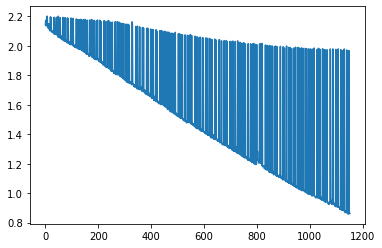

In [ ]:
## STOP HERE ##
import matplotlib.pyplot as plt
plt.plot(loss_list)


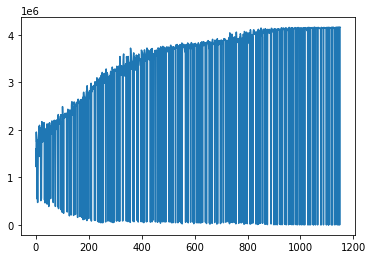

In [ ]:
plt.plot(acc_list)

image: (1, 256, 256, 64) label: torch.Size([256, 256, 64])
0.7720321140329416


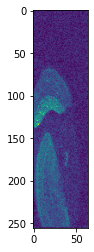

In [ ]:
#checking images manually
import random
def random_noise(image, noise_percent=0.2,  p=0.5):
    if randint(1,100) < p*100:
        image = image+torch.rand(image.shape).to("cuda")*noise_percent
        return image
    else:
        return(image)

for i, (images, labels) in enumerate(train_loader):
    noise = torch.rand(images.shape).to("cuda")*0.5
    images = images.to("cuda")
    
    #plt.imshow((images + noise).cpu()[0,0,10,:,:])
    noisy_img = random_noise(images, noise_percent=0.2, p=1)
    plt.imshow(noisy_img.cpu()[0,0,10,:,:])
    print(random.random())
    break

In [ ]:
model = torch.load('/content/drive/My Drive/BeeBrain_model.ckpt')

In [ ]:
# Test the model
with torch.no_grad(): # no gradient? what does it do?
    correct = 0
    total = 0
    for images, labels in test_loader: # can output 2 items like this out of test_loader output
              
        # labels are rotated by 90 degree 
        labels = torch.transpose(images,3,2)
        # labels are made binary by threshold 0.5
        labels = torch.where(labels>0.5,torch.tensor(1),torch.tensor(0)) # konvertiert bild zu binary
        # labels are flattened to have 1 value for each pixel to check if correct later
        labels = labels.flatten() # 100*changes to (100*28*28) -> (N) 
        # images to gpu
        images = images.to(device, dtype=torch.float)
        labels = labels.to(device, dtype=torch.float)

        
        # images go through forward of model output: (2,28,28)
        print("labelvalues: ", labels)
        outputs = model(images)
        # swaps the dimensions so the 2 is at the end but the image dimensions are still right
        outputs = torch.transpose(outputs, 1,-1) # swaps the second with the last dimension
        outputs = torch.transpose(outputs,1,3)
        # needs another dimension swap for 3 dimensional
        outputs = torch.transpose(outputs, 1,2)
        # flattens to check corrected of all pixels with labels
        outputs = outputs.flatten(0,3)
        # takes the index of the max value of the outputs for each pixel -> means 0 or 1 for what is calculated 
        # to be more probably at the given pixel
        values, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item() # (predicted == labels) gibt eine reihe von true-false-true...
        # wieder. Weil True 1 ist und False 0, ist die summe genau die zahl der richtigen. Item gibt es als Int
        total += len(outputs)

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

# Save the model and plot
#torch.save(model.state_dict(), MODEL_STORE_PATH + '_model.ckpt')


NameError: ignored

In [ ]:
### 1 Class at a time approach STARTS HERE !!! ###

In [1]:
from typing import Sequence, Optional

import torch


class CombinedLoss(torch.nn.Module):
    """Defines a loss function as a weighted sum of combinable loss criteria.
    Args:
        criteria: List of loss criterion modules that should be combined.
        weight: Weight assigned to the individual loss criteria (in the same
            order as ``criteria``).
        device: The device on which the loss should be computed. This needs
            to be set to the device that the loss arguments are allocated on.
    """

    def __init__(
            self,
            criteria: Sequence[torch.nn.Module],
            weight: Optional[Sequence[float]] = None,
            device: torch.device = None
    ):
        super().__init__()
        self.criteria = torch.nn.ModuleList(criteria)
        self.device = device
        if weight is None:
            weight = torch.ones(len(criteria))
        else:
            weight = torch.as_tensor(weight, dtype=torch.float32)
            assert weight.shape == (len(criteria),)
        self.register_buffer('weight', weight.to(self.device))

    def forward(self, *args):
        loss = torch.tensor(0., device=self.device)
        for crit, weight in zip(self.criteria, self.weight):
            crit = crit.to(self.device)
            loss += weight * crit(*args)
        return loss


def _channelwise_sum(x: torch.Tensor):
    """Sum-reduce all dimensions of a tensor except dimension 1 (C)"""
    reduce_dims = tuple([0] + list(range(x.dim()))[2:])  # = (0, 2, 3, ...)
    return x.sum(dim=reduce_dims)


def dice_loss(probs,
              target,
              weight=1.,
              eps=0.0001,
              ignore_index=False,
              no_reduction=False,
              ):
    # Probs need to be softmax probabilities, not raw network outputs
    tsh, psh = target.shape, probs.shape

    if tsh == psh:  # Already one-hot
        onehot_target = target.to(probs.dtype)
    elif tsh[0] == psh[0] and tsh[1:] == psh[2:]:  # Assume dense target storage, convert to one-hot
        onehot_target = torch.zeros_like(probs)
        onehot_target.scatter_(1, target.unsqueeze(1), 1)
    else:
        raise ValueError(
            f'Target shape {target.shape} is not compatible with output shape {probs.shape}.'
        )

    intersection = probs * onehot_target  # (N, C, ...)
    numerator = 2 * _channelwise_sum(intersection)  # (C,)
    denominator = probs + onehot_target  # (N, C, ...)
    denominator = _channelwise_sum(denominator) + eps  # (C,)
    loss_per_channel = 1 - (numerator / denominator)  # (C,)
    weighted_loss_per_channel = weight * loss_per_channel  # (C,)
    if ignore_index:
        weighted_loss_per_channel = weighted_loss_per_channel[1:]
        if no_reduction:
            return weighted_loss_per_channel
        else:
            return weighted_loss_per_channel.mean()
    else:
        if no_reduction:
            return weighted_loss_per_channel
        else:
            return weighted_loss_per_channel.mean()


class DiceLoss(torch.nn.Module):
    """Generalized Dice Loss, as described in https://arxiv.org/abs/1707.03237.
    Works for n-dimensional data. Assuming that the ``output`` tensor to be
    compared to the ``target`` has the shape (N, C, D, H, W), the ``target``
    can either have the same shape (N, C, D, H, W) (one-hot encoded) or
    (N, D, H, W) (with dense class indices, as in
    ``torch.nn.CrossEntropyLoss``). If the latter shape is detected, the
    ``target`` is automatically internally converted to a one-hot tensor
    for loss calculation.
    Args:
        apply_softmax: If ``True``, a softmax operation is applied to the
            ``output`` tensor before loss calculation. This is necessary if
            your model does not already apply softmax as the last layer.
            Use this if your model outputs 2 channels or more.
            If ``False``, ``output`` is assumed to already contain softmax
            probabilities.
        apply_sigmoid: If ``True``, a sigmoid operation is applied to the
            ``output`` tensor before loss calculation. This is necessary if
            your model does not already apply sigmoid as the last layer.
            Use this if your model ouputs only 1 channel.
            If ``False``, ``output`` is assumed to already contain sigmoid
            probabilities.
        weight: Weight tensor for class-wise loss rescaling.
            Has to be of shape (C,). If ``None``, classes are weighted equally.
    """

    def __init__(self,
                 apply_activation_function='softmax',
                 weight=torch.tensor(1.),
                 ignore_index=False,
                 no_reduction=False,
                 ):
        super().__init__()
        if apply_activation_function == 'softmax':
            self.layer = torch.nn.Softmax(dim=1)
        elif apply_activation_function == 'sigmoid':
            self.layer = torch.nn.Sigmoid()

        self.dice = dice_loss
        self.register_buffer('weight', weight)
        self.ignore_index = ignore_index
        self.no_reduction = no_reduction

    def forward(self, output, target):
        probs = self.layer(output)
        return self.dice(probs,
                         target,
                         weight=self.weight,
                         ignore_index=self.ignore_index,
                         no_reduction=self.no_reduction
                         )




In [2]:
## Transformation Functions -> outsource in Classfile later
from skimage.transform import rotate
from skimage import io
import matplotlib.pyplot as plt
from numpy import transpose
from random import randint, sample,seed, random
import numpy as np
from PIL import Image
#torchvision.transforms.RandomRotation(degrees, resample=False, expand=False, center=None, fill=None)
#torchvision.transforms.RandomHorizontalFlip(p=0.5)

# transformation with np.flip

def rotate3D(image, degreeX=0, degreeY=0, resize = True):
    stack = list()
    stack2 = list()
    if degreeX != 0:
        for i in image:
            i = Image.fromarray(np.uint16(i))
            i = i.rotate(degreeX)
            i = np.array(i)
            stack.append(i)
    else: stack = image

    if degreeY != 0:
        stack = transpose(stack)
        for i in stack: 
            i = Image.fromarray(np.uint16(i))
            i = i.rotate(degreeY)
            i = np.array(i)
            stack2.append(i)
        stack = transpose(stack2)
            
    else: stack2 = stack
    return stack2

def random_rotate3D_90(image,InnerSeed, p=0.5, resize = True):
    #seed(InnerSeed/2)
    if randint(1,100) < p*100:

        stack = list()
        stack2 = list()

        degreeX = sample((90,0,-90),1)[0]
        degreeY = sample((90,0,-90),1)[0]

        if degreeX != 0:
            for i in image:
                i = Image.fromarray(np.uint16(i))
                i = i.rotate(degreeX)
                i = np.array(i)
                stack.append(i)
        else: stack = image

        if degreeY != 0:
            stack = transpose(stack)
            for i in stack: 
                i = Image.fromarray(np.uint16(i))
                i = i.rotate(degreeY)
                i = np.array(i)
                stack2.append(i)
            stack = transpose(stack2)
                
        else: stack2 = stack
        return np.array(stack2)
    else:
        return(image)

def random_rotate3D_1830(image,InnerSeed, p=0.5, resize = True):
    seed(InnerSeed/3)
    print("seed: ", InnerSeed)
    print("random: ", randint(1,100))
    if randint(1,100) < p*100:

        stack = list()
        stack2 = list()

        degreeX = sample((180,0),1)[0]
        degreeY = sample((180,0),1)[0]

        if degreeX != 0:
            for i in image:
                i = Image.fromarray(np.uint16(i))
                i = i.rotate(degreeX)
                i = np.array(i)
                stack.append(i)
        else: stack = image

        if degreeY != 0:
            stack = transpose(stack)
            for i in stack: 
                i = Image.fromarray(np.uint16(i))
                i = i.rotate(degreeY)
                i = np.array(i)
                stack2.append(i)
            stack = transpose(stack2)
                
        else: stack2 = stack
        #print(np.array(stack2).shape)
        return np.array(stack2)
    else:
        #print(image.shape)
        return(image)


def random_rotate3D_flip(image,InnerSeed, p=0.5, resize = True):
    seed(InnerSeed/3)
    if randint(1,100) < p*100:


        degreeX = sample((180,0),1)[0]
        #print("X", degreeX)
        degreeY = sample((180,0),1)[0]
        #print("Y", degreeY)
        degreeZ = sample((180,0),1)[0]
        #print("Z", degreeZ)

        if degreeX != 0:
            image = np.flip(image, axis=-1)

        if degreeY != 0:
            image = np.flip(image, axis=-2)
                
        if degreeZ != 0:
            image = np.flip(image, axis=-3)
        return image
    else:
        return(image)

def random_rotate3D_transpose(image,InnerSeed, p=0.5, resize = True):
    seed(InnerSeed/2)
    if randint(1,100) < p*100:


        degreeX = sample((180,0),1)[0]
        #print("Xt", degreeX)
        degreeY = sample((180,0),1)[0]
        #print("Yt", degreeY)
        degreeZ = sample((180,0),1)[0]
        #print("Zt", degreeZ)

        if degreeX != 0:
            image = np.transpose(image, (0,2,1))

        if degreeY != 0:
            image = np.transpose(image, (1,0,2))
                
        if degreeZ != 0:
            image = np.transpose(image, (2,1,0))
        return image
    else:
        return(image)

def random_noise(image,  p=0.5):
    noise_intensity = random()/2
    if randint(1,100) < p*100:

        image = image+ torch.rand(image.shape)*noise_intensity
        return image
    else:
        return(image)



In [3]:
from collections import OrderedDict

import torch
import torch.nn as nn
from math import floor

class UNet(nn.Module):

    #def __init__(self, in_channels=1, out_channels=2, init_features=8): # für nur 2 classen variante
    def __init__(self, in_channels=1, out_channels=2, init_features=16):
        super(UNet, self).__init__()

        features = init_features
        self.encoder1 = UNet._block(in_channels, features, name="enc1")
        self.pool1 = nn.MaxPool3d(kernel_size=2, stride=2, ceil_mode=True)
        self.encoder2 = UNet._block(features, features * 2, name="enc2")
        self.pool2 = nn.MaxPool3d(kernel_size=2, stride=2)
        self.encoder3 = UNet._block(features * 2, features * 4, name="enc3")
        self.pool3 = nn.MaxPool3d(kernel_size=2, stride=2)
        self.encoder4 = UNet._block(features * 4, features * 8, name="enc4")
        self.pool4 = nn.MaxPool3d(kernel_size=2, stride=2)
        self.encoder5 = UNet._block(features * 8, features * 16, name="enc5")
        self.pool5 = nn.MaxPool3d(kernel_size=2, stride=2)
        #self.encoder6 = UNet._block(features * 16, features * 32, name="enc4")
        #self.pool6 = nn.MaxPool3d(kernel_size=2, stride=2)
        

        self.bottleneck = UNet._block(features * 16, features * 32, name="bottleneck")  

        #self.upconv6 = nn.ConvTranspose3d(
        #    features * 64, features * 32, kernel_size=2, stride=2                     
        #)
        #self.decoder6 = UNet._block((features * 32) * 2, features * 32, name="dec3") 
        self.upconv5 = nn.ConvTranspose3d(
            features * 32, features * 16, kernel_size=2, stride=2                     
        )
        self.decoder5 = UNet._block((features * 16) * 2, features * 16, name="dec5")
        self.upconv4 = nn.ConvTranspose3d(
            features * 16, features * 8, kernel_size=2, stride=2
        )                                                                                  
        self.decoder4 = UNet._block((features * 8) * 2, features * 8, name="dec4")      
        self.upconv3 = nn.ConvTranspose3d(
            features * 8, features * 4, kernel_size=2, stride=2                     
        )
        self.decoder3 = UNet._block((features * 4) * 2, features * 4, name="dec3")
        self.upconv2 = nn.ConvTranspose3d(
            features * 4, features * 2, kernel_size=2, stride=2
        )
        self.decoder2 = UNet._block((features * 2) * 2, features * 2, name="dec2")
        self.upconv1 = nn.ConvTranspose3d(
            features * 2, features, kernel_size=2, stride=2
        )
        self.decoder1 = UNet._block(features * 2, features, name="dec1")
        

        self.conv = nn.Conv3d(
            in_channels=features, out_channels=out_channels, kernel_size=1
        )

        self.dropout = nn.Dropout()


    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool1(enc1))
        enc3 = self.encoder3(self.pool2(enc2))
        enc4 = self.encoder4(self.pool3(enc3))
        enc5 = self.encoder5(self.pool4(enc4))
        #enc6 = self.encoder6(self.pool5(enc5))
      

        bottleneck = self.bottleneck(self.pool5(enc5))
        bottleneck = self.dropout(bottleneck)

        #dec6 = self.upconv6(bottleneck)
        #dec6 = torch.cat((dec6, enc6), dim=1)
        #dec6 = self.decoder6(dec6)

        dec5 = self.upconv5(bottleneck)
        dec5 = torch.cat((dec5,enc5), dim=1)
        dec5 = self.decoder5(dec5)

        dec4 = self.upconv4(dec5)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.decoder4(dec4)

        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1) 
        dec3 = self.decoder3(dec3)

        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.decoder2(dec2)

        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.decoder1(dec1)

        return (self.conv(dec1))

    @staticmethod
    def _block(in_channels, features, name):
        return nn.Sequential(
            OrderedDict(
                [
                    (
                        name + "conv1",
                        nn.Conv3d(
                            in_channels=in_channels,
                            out_channels=features,
                            kernel_size=3,
                            padding=1,
                            bias=False,
                        ),
                    ),
                    (name + "norm1", nn.BatchNorm3d(num_features=features)),
                    (name + "relu1", nn.SELU(inplace=True)),
                    (
                        name + "conv2",
                        nn.Conv3d(
                            in_channels=features,
                            out_channels=features,
                            kernel_size=3,
                            padding=1,
                            bias=False,
                        ),
                    ),
                    (name + "norm2", nn.BatchNorm3d(num_features=features)),
                    (name + "relu2", nn.SELU(inplace=True)),
                ]
            )
        )

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
import torchvision.datasets

import numpy as np
from torch.utils.data import Dataset
import os
from skimage import io
from skimage.color import rgb2gray
from random import seed,randint



In [6]:

    #Initializing the Object for CNN
#model = UNet()
model = UNet()
#model = testNet()



if torch.cuda.is_available():
    device = torch.device("cuda") 
    torch.cuda.init()
else:
    device = torch.device("cpu")
#device = torch.device("cpu")
model.to("cuda")




class BeeDataset_2class(Dataset):

    def __init__(self, source_dir:str, transform, channel=0, labelclass=0):
        self.source_dir = source_dir
        self.data = []
        self.img = []
        self.transform = transform
        self.channel = channel
        # path to folder
        self.path = source_dir
        # takes all names in source folder and opens each image
        self.files = os.listdir(self.path+ "tiny_imagesTr/")
        self.labels = os.listdir(self.path+ "tiny_labelsTr/")
        self.labelclass = labelclass
    
    def __len__(self):
        # returns the length of the dataset/folder
        return len(self.files)

    def __getitem__(self,idx):
        seed()
        InnerSeed = randint(1,100000)
        ## better for biiiig datasets : loads the indexes data as soon as you ask for it (memory for speed)
        

        img = io.imread(self.path+"tiny_imagesTr/"+self.files[idx])
        label = io.imread(self.path+"tiny_labelsTr/new/"+self.files[idx].replace("tiny_", "new_tiny_label"))
        #label = np.int16(rgb2gray(label))
        #img = np.uint8(img) zu viel informationsverlust
        # Some Random Transforms
        #seed(InnerSeed)
        #img = random_rotate3D(img, InnerSeed = InnerSeed)
        #img = random_rotate3D_transpose(img, InnerSeed= InnerSeed)
        #img = random_rotate3D_flip(img, InnerSeed= InnerSeed)
        #img = np.flip(img,axis=-1)
        #seed(InnerSeed)
        #label = random_rotate3D(label, InnerSeed = InnerSeed)
        #label = random_rotate3D_transpose(label, InnerSeed= InnerSeed)
        #label = random_rotate3D_flip(label, InnerSeed= InnerSeed)
        #label = np.flip(label, axis = -1)
        img = self.transform(img)
        # adds 1 empty dimension
        img = random_noise(img, p=0.5)

        #img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
        img = np.expand_dims(img,0)


        # normalisation in transform pipeline not on labels
        #label = torch.tensor(label, dtype= torch.float)
        label = self.transform(label)
        


        ## In 2class variant: find out which class is background -> always use this as 0 and 1 as the class
        ## after converting to grayscale, takes unique values as classes
        
        ## convertion to 0-9 maybe not needed
        #unique = label.unique()
        #for i in range(0,len(unique)):
        #    label[label==unique[self.labelclass]] = 0
        #    label[label!=self.labelclass] = 1
        

        return img, label



# Hyperparameters
num_epochs = 1000
#bei batchsize 2 will augmentation noch net
batch_size = 1
learning_rate = 0.0001


#train_data_path = "C:/Users/nicbr/BeeBrain/"
#train_data_path = "/home/nico/BeeBrain/"
train_data_path = "/content/drive/My Drive/BeeBrain/"
MODEL_STORE_PATH = '.'



# transforms to apply to the data
from sklearn.preprocessing import Normalizer
from skimage.transform import rotate
from numpy import transpose


def multi_dim_normalize(x):
    shape = x.shape
    return ((x.flatten() - x.min()) / x.max()).reshape(shape)

transformer = Normalizer()
img_transforms = transforms.Compose([#transforms.Lambda(lambda x: random_rotate3D(x, InnerSeed= InnerSeed)),
                                     #transforms.Lambda(lambda x: random_rotate3D_90(x, InnerSeed = InnerSeed)),
                                     #transforms.Lambda(lambda x: random_rotate3D_flip180(x, InnerSeed = InnerSeed)),
                                     transforms.Lambda(lambda x: multi_dim_normalize(x)),
                                     transforms.Lambda(lambda x: torch.tensor(x, dtype= torch.float)) # transforms.ToTensor doesnt work on that many dimensions
                                           ])

#def dice_loss(pred,target):
#    numerator = 2 * torch.sum(pred * target)
#    denominator = torch.sum(pred + target)
#    return 1 - (numerator + 1) / (denominator + 1)
    


Labelnumber [5], Epoch [1/1000], Step [2/8], Loss: 863.1637,---------------------------------- Accuracy: 67.27%
Labelnumber [5], Epoch [2/1000], Step [2/8], Loss: 977.4451,---------------------------------- Accuracy: 65.45%
Labelnumber [5], Epoch [3/1000], Step [2/8], Loss: 1030.8658,---------------------------------- Accuracy: 66.89%
Labelnumber [5], Epoch [4/1000], Step [2/8], Loss: 806.3582,---------------------------------- Accuracy: 65.09%
Labelnumber [5], Epoch [5/1000], Step [2/8], Loss: 792.3901,---------------------------------- Accuracy: 70.25%
Labelnumber [5], Epoch [6/1000], Step [2/8], Loss: 922.1736,---------------------------------- Accuracy: 75.10%
Labelnumber [5], Epoch [7/1000], Step [2/8], Loss: 833.1626,---------------------------------- Accuracy: 75.64%
Labelnumber [5], Epoch [8/1000], Step [2/8], Loss: 997.6101,---------------------------------- Accuracy: 79.72%
Labelnumber [5], Epoch [9/1000], Step [2/8], Loss: 767.9841,---------------------------------- Accuracy

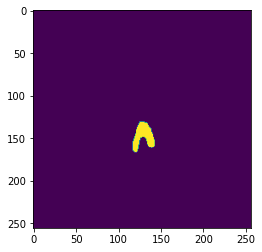

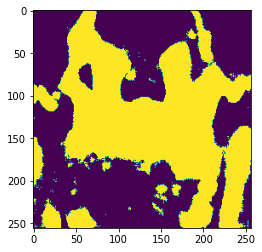

Labelnumber [5], Epoch [11/1000], Step [2/8], Loss: 976.7108,---------------------------------- Accuracy: 79.47%
Labelnumber [5], Epoch [12/1000], Step [2/8], Loss: 970.0607,---------------------------------- Accuracy: 83.46%
Labelnumber [5], Epoch [13/1000], Step [2/8], Loss: 748.2658,---------------------------------- Accuracy: 82.95%
Labelnumber [5], Epoch [14/1000], Step [2/8], Loss: 863.8060,---------------------------------- Accuracy: 80.68%
Labelnumber [5], Epoch [15/1000], Step [2/8], Loss: 961.4055,---------------------------------- Accuracy: 86.01%
Labelnumber [5], Epoch [16/1000], Step [2/8], Loss: 741.4639,---------------------------------- Accuracy: 84.10%
Labelnumber [5], Epoch [17/1000], Step [2/8], Loss: 800.3506,---------------------------------- Accuracy: 88.19%
Labelnumber [5], Epoch [18/1000], Step [2/8], Loss: 788.8923,---------------------------------- Accuracy: 86.47%
Labelnumber [5], Epoch [19/1000], Step [2/8], Loss: 796.1236,---------------------------------- 

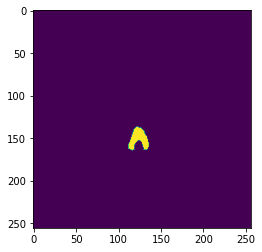

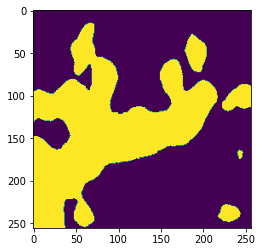

Labelnumber [5], Epoch [21/1000], Step [2/8], Loss: 733.4271,---------------------------------- Accuracy: 87.15%
Labelnumber [5], Epoch [22/1000], Step [2/8], Loss: 892.3973,---------------------------------- Accuracy: 86.62%
Labelnumber [5], Epoch [23/1000], Step [2/8], Loss: 891.6038,---------------------------------- Accuracy: 87.92%
Labelnumber [5], Epoch [24/1000], Step [2/8], Loss: 779.8279,---------------------------------- Accuracy: 87.85%
Labelnumber [5], Epoch [25/1000], Step [2/8], Loss: 730.2532,---------------------------------- Accuracy: 88.07%
Labelnumber [5], Epoch [26/1000], Step [2/8], Loss: 851.8102,---------------------------------- Accuracy: 88.91%
Labelnumber [5], Epoch [27/1000], Step [2/8], Loss: 725.2086,---------------------------------- Accuracy: 89.51%
Labelnumber [5], Epoch [28/1000], Step [2/8], Loss: 726.9861,---------------------------------- Accuracy: 88.13%
Labelnumber [5], Epoch [29/1000], Step [2/8], Loss: 936.2650,---------------------------------- 

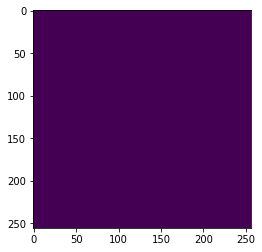

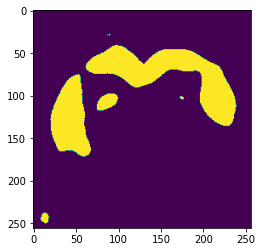

Labelnumber [5], Epoch [31/1000], Step [2/8], Loss: 845.2980,---------------------------------- Accuracy: 88.66%
Labelnumber [5], Epoch [32/1000], Step [2/8], Loss: 779.2774,---------------------------------- Accuracy: 89.06%
Labelnumber [5], Epoch [33/1000], Step [2/8], Loss: 722.1415,---------------------------------- Accuracy: 89.08%
Labelnumber [5], Epoch [34/1000], Step [2/8], Loss: 826.9911,---------------------------------- Accuracy: 90.16%
Labelnumber [5], Epoch [35/1000], Step [2/8], Loss: 716.2164,---------------------------------- Accuracy: 88.63%
Labelnumber [5], Epoch [36/1000], Step [2/8], Loss: 718.3227,---------------------------------- Accuracy: 88.85%
Labelnumber [5], Epoch [37/1000], Step [2/8], Loss: 772.7809,---------------------------------- Accuracy: 89.70%
Labelnumber [5], Epoch [38/1000], Step [2/8], Loss: 771.8379,---------------------------------- Accuracy: 90.18%
Labelnumber [5], Epoch [39/1000], Step [2/8], Loss: 869.6801,---------------------------------- 

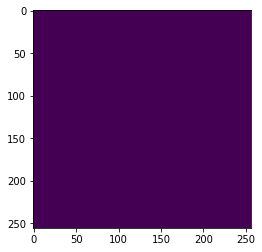

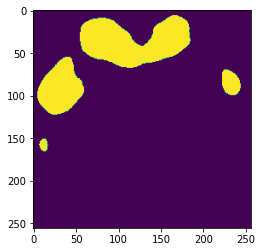

Labelnumber [5], Epoch [41/1000], Step [2/8], Loss: 716.1152,---------------------------------- Accuracy: 88.72%
Labelnumber [5], Epoch [42/1000], Step [2/8], Loss: 919.6851,---------------------------------- Accuracy: 89.24%
Labelnumber [5], Epoch [43/1000], Step [2/8], Loss: 712.2372,---------------------------------- Accuracy: 90.51%
Labelnumber [5], Epoch [44/1000], Step [2/8], Loss: 864.6146,---------------------------------- Accuracy: 89.48%
Labelnumber [5], Epoch [45/1000], Step [2/8], Loss: 862.6481,---------------------------------- Accuracy: 89.55%
Labelnumber [5], Epoch [46/1000], Step [2/8], Loss: 814.8607,---------------------------------- Accuracy: 89.15%
Labelnumber [5], Epoch [47/1000], Step [2/8], Loss: 764.6367,---------------------------------- Accuracy: 90.95%
Labelnumber [5], Epoch [48/1000], Step [2/8], Loss: 754.3707,---------------------------------- Accuracy: 91.21%
Labelnumber [5], Epoch [49/1000], Step [2/8], Loss: 911.6078,---------------------------------- 

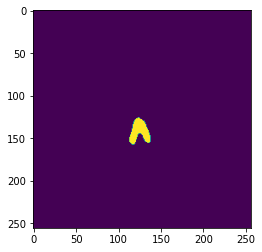

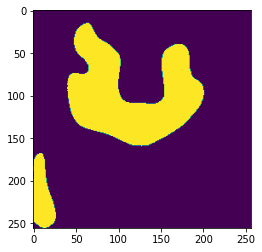

Labelnumber [5], Epoch [51/1000], Step [2/8], Loss: 856.5873,---------------------------------- Accuracy: 90.46%
Labelnumber [5], Epoch [52/1000], Step [2/8], Loss: 701.3281,---------------------------------- Accuracy: 90.32%
Labelnumber [5], Epoch [53/1000], Step [2/8], Loss: 854.7585,---------------------------------- Accuracy: 91.21%
Labelnumber [5], Epoch [54/1000], Step [2/8], Loss: 703.0002,---------------------------------- Accuracy: 90.94%
Labelnumber [5], Epoch [55/1000], Step [2/8], Loss: 904.6534,---------------------------------- Accuracy: 91.40%
Labelnumber [5], Epoch [56/1000], Step [2/8], Loss: 697.1811,---------------------------------- Accuracy: 91.16%
Labelnumber [5], Epoch [57/1000], Step [2/8], Loss: 700.8142,---------------------------------- Accuracy: 91.21%
Labelnumber [5], Epoch [58/1000], Step [2/8], Loss: 754.9119,---------------------------------- Accuracy: 91.31%
Labelnumber [5], Epoch [59/1000], Step [2/8], Loss: 695.8152,---------------------------------- 

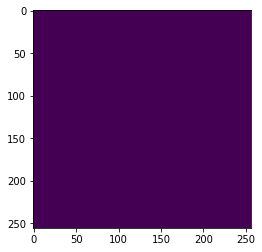

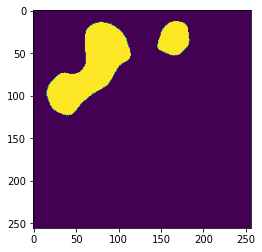

Labelnumber [5], Epoch [61/1000], Step [2/8], Loss: 743.5005,---------------------------------- Accuracy: 90.70%
Labelnumber [5], Epoch [62/1000], Step [2/8], Loss: 847.0789,---------------------------------- Accuracy: 90.84%
Labelnumber [5], Epoch [63/1000], Step [2/8], Loss: 801.3083,---------------------------------- Accuracy: 91.13%
Labelnumber [5], Epoch [64/1000], Step [2/8], Loss: 694.8542,---------------------------------- Accuracy: 92.38%
Labelnumber [5], Epoch [65/1000], Step [2/8], Loss: 751.1677,---------------------------------- Accuracy: 91.21%
Labelnumber [5], Epoch [66/1000], Step [2/8], Loss: 798.0686,---------------------------------- Accuracy: 91.61%
Labelnumber [5], Epoch [67/1000], Step [2/8], Loss: 748.8271,---------------------------------- Accuracy: 92.22%
Labelnumber [5], Epoch [68/1000], Step [2/8], Loss: 842.2596,---------------------------------- Accuracy: 92.07%
Labelnumber [5], Epoch [69/1000], Step [2/8], Loss: 809.4251,---------------------------------- 

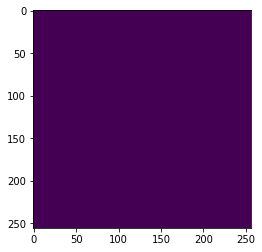

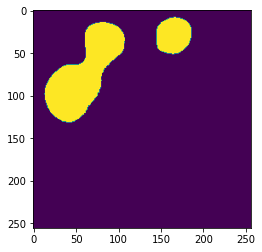

Labelnumber [5], Epoch [71/1000], Step [2/8], Loss: 691.0133,---------------------------------- Accuracy: 92.37%
Labelnumber [5], Epoch [72/1000], Step [2/8], Loss: 690.3567,---------------------------------- Accuracy: 92.56%
Labelnumber [5], Epoch [73/1000], Step [2/8], Loss: 744.6017,---------------------------------- Accuracy: 92.07%
Labelnumber [5], Epoch [74/1000], Step [2/8], Loss: 806.6262,---------------------------------- Accuracy: 91.62%
Labelnumber [5], Epoch [75/1000], Step [2/8], Loss: 692.5506,---------------------------------- Accuracy: 90.29%
Labelnumber [5], Epoch [76/1000], Step [2/8], Loss: 734.6609,---------------------------------- Accuracy: 93.32%
Labelnumber [5], Epoch [77/1000], Step [2/8], Loss: 790.4794,---------------------------------- Accuracy: 92.04%
Labelnumber [5], Epoch [78/1000], Step [2/8], Loss: 886.9288,---------------------------------- Accuracy: 92.20%
Labelnumber [5], Epoch [79/1000], Step [2/8], Loss: 685.9622,---------------------------------- 

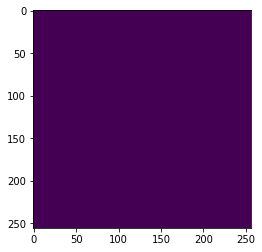

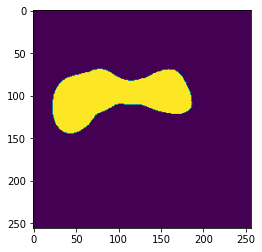

Labelnumber [5], Epoch [81/1000], Step [2/8], Loss: 739.7640,---------------------------------- Accuracy: 92.56%
Labelnumber [5], Epoch [82/1000], Step [2/8], Loss: 800.6443,---------------------------------- Accuracy: 92.67%
Labelnumber [5], Epoch [83/1000], Step [2/8], Loss: 739.0811,---------------------------------- Accuracy: 92.80%
Labelnumber [5], Epoch [84/1000], Step [2/8], Loss: 737.7914,---------------------------------- Accuracy: 92.78%
Labelnumber [5], Epoch [85/1000], Step [2/8], Loss: 881.6879,---------------------------------- Accuracy: 92.53%
Labelnumber [5], Epoch [86/1000], Step [2/8], Loss: 680.5080,---------------------------------- Accuracy: 92.68%
Labelnumber [5], Epoch [87/1000], Step [2/8], Loss: 684.3355,---------------------------------- Accuracy: 93.36%
Labelnumber [5], Epoch [88/1000], Step [2/8], Loss: 679.3901,---------------------------------- Accuracy: 92.87%
Labelnumber [5], Epoch [89/1000], Step [2/8], Loss: 880.7620,---------------------------------- 

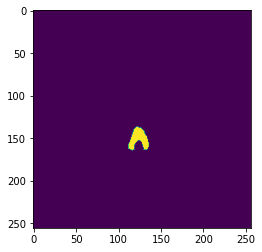

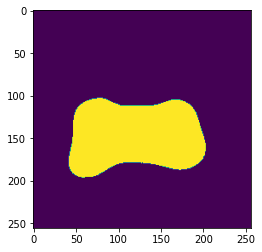

Labelnumber [5], Epoch [91/1000], Step [2/8], Loss: 795.5123,---------------------------------- Accuracy: 93.29%
Labelnumber [5], Epoch [92/1000], Step [2/8], Loss: 780.7264,---------------------------------- Accuracy: 92.73%
Labelnumber [5], Epoch [93/1000], Step [2/8], Loss: 876.0416,---------------------------------- Accuracy: 93.47%
Labelnumber [5], Epoch [94/1000], Step [2/8], Loss: 779.5123,---------------------------------- Accuracy: 93.13%
Labelnumber [5], Epoch [95/1000], Step [2/8], Loss: 875.6683,---------------------------------- Accuracy: 93.67%
Labelnumber [5], Epoch [96/1000], Step [2/8], Loss: 677.5836,---------------------------------- Accuracy: 93.77%
Labelnumber [5], Epoch [97/1000], Step [2/8], Loss: 874.0876,---------------------------------- Accuracy: 93.69%
Labelnumber [5], Epoch [98/1000], Step [2/8], Loss: 822.5591,---------------------------------- Accuracy: 93.94%
Labelnumber [5], Epoch [99/1000], Step [2/8], Loss: 730.1191,---------------------------------- 

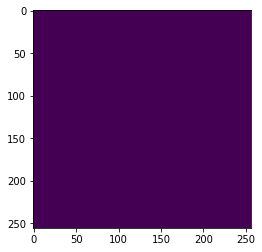

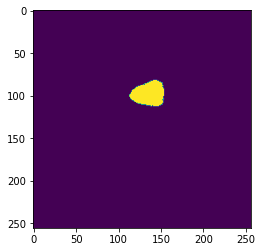

Labelnumber [5], Epoch [101/1000], Step [2/8], Loss: 775.7727,---------------------------------- Accuracy: 93.58%
Labelnumber [5], Epoch [102/1000], Step [2/8], Loss: 728.4371,---------------------------------- Accuracy: 93.60%
Labelnumber [5], Epoch [103/1000], Step [2/8], Loss: 670.9852,---------------------------------- Accuracy: 93.64%
Labelnumber [5], Epoch [104/1000], Step [2/8], Loss: 818.9996,---------------------------------- Accuracy: 93.80%
Labelnumber [5], Epoch [105/1000], Step [2/8], Loss: 870.7208,---------------------------------- Accuracy: 93.30%
Labelnumber [5], Epoch [106/1000], Step [2/8], Loss: 673.5317,---------------------------------- Accuracy: 93.14%
Labelnumber [5], Epoch [107/1000], Step [2/8], Loss: 869.0349,---------------------------------- Accuracy: 93.75%
Labelnumber [5], Epoch [108/1000], Step [2/8], Loss: 672.4227,---------------------------------- Accuracy: 94.38%
Labelnumber [5], Epoch [109/1000], Step [2/8], Loss: 715.6124,--------------------------

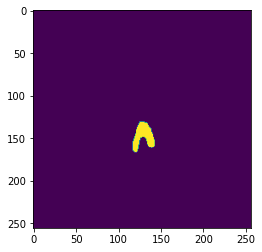

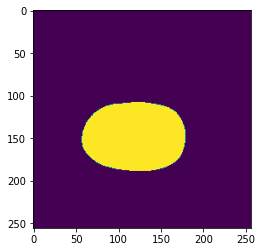

Labelnumber [5], Epoch [111/1000], Step [2/8], Loss: 724.4828,---------------------------------- Accuracy: 94.10%
Labelnumber [5], Epoch [112/1000], Step [2/8], Loss: 670.4196,---------------------------------- Accuracy: 94.27%
Labelnumber [5], Epoch [113/1000], Step [2/8], Loss: 666.6746,---------------------------------- Accuracy: 94.41%
Labelnumber [5], Epoch [114/1000], Step [2/8], Loss: 669.6748,---------------------------------- Accuracy: 94.20%
Labelnumber [5], Epoch [115/1000], Step [2/8], Loss: 665.6481,---------------------------------- Accuracy: 94.48%
Labelnumber [5], Epoch [116/1000], Step [2/8], Loss: 863.3273,---------------------------------- Accuracy: 94.57%
Labelnumber [5], Epoch [117/1000], Step [2/8], Loss: 770.7512,---------------------------------- Accuracy: 93.96%
Labelnumber [5], Epoch [118/1000], Step [2/8], Loss: 814.1089,---------------------------------- Accuracy: 94.27%
Labelnumber [5], Epoch [119/1000], Step [2/8], Loss: 812.5587,--------------------------

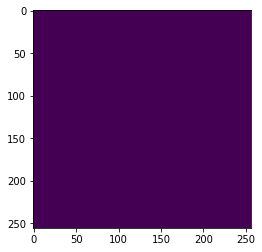

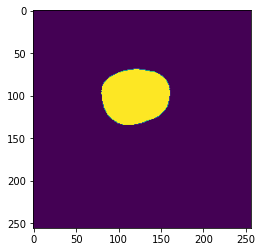

Labelnumber [5], Epoch [121/1000], Step [2/8], Loss: 780.4279,---------------------------------- Accuracy: 94.43%
Labelnumber [5], Epoch [122/1000], Step [2/8], Loss: 779.7313,---------------------------------- Accuracy: 94.51%
Labelnumber [5], Epoch [123/1000], Step [2/8], Loss: 719.6996,---------------------------------- Accuracy: 94.45%
Labelnumber [5], Epoch [124/1000], Step [2/8], Loss: 665.5416,---------------------------------- Accuracy: 94.74%
Labelnumber [5], Epoch [125/1000], Step [2/8], Loss: 665.4896,---------------------------------- Accuracy: 94.73%
Labelnumber [5], Epoch [126/1000], Step [2/8], Loss: 662.0585,---------------------------------- Accuracy: 94.64%
Labelnumber [5], Epoch [127/1000], Step [2/8], Loss: 664.4813,---------------------------------- Accuracy: 94.51%
Labelnumber [5], Epoch [128/1000], Step [2/8], Loss: 776.9836,---------------------------------- Accuracy: 94.87%
Labelnumber [5], Epoch [129/1000], Step [2/8], Loss: 776.7164,--------------------------

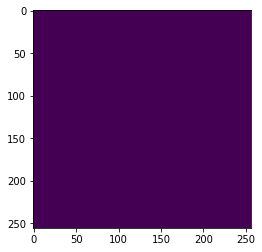

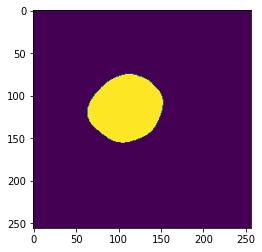

Labelnumber [5], Epoch [131/1000], Step [2/8], Loss: 857.5308,---------------------------------- Accuracy: 94.87%
Labelnumber [5], Epoch [132/1000], Step [2/8], Loss: 775.5481,---------------------------------- Accuracy: 95.28%
Labelnumber [5], Epoch [133/1000], Step [2/8], Loss: 761.6046,---------------------------------- Accuracy: 95.11%
Labelnumber [5], Epoch [134/1000], Step [2/8], Loss: 806.5134,---------------------------------- Accuracy: 94.29%
Labelnumber [5], Epoch [135/1000], Step [2/8], Loss: 705.6259,---------------------------------- Accuracy: 94.59%
Labelnumber [5], Epoch [136/1000], Step [2/8], Loss: 855.8982,---------------------------------- Accuracy: 95.00%
Labelnumber [5], Epoch [137/1000], Step [2/8], Loss: 659.7722,---------------------------------- Accuracy: 94.90%
Labelnumber [5], Epoch [138/1000], Step [2/8], Loss: 714.4434,---------------------------------- Accuracy: 95.29%
Labelnumber [5], Epoch [139/1000], Step [2/8], Loss: 773.0449,--------------------------

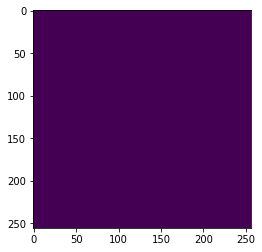

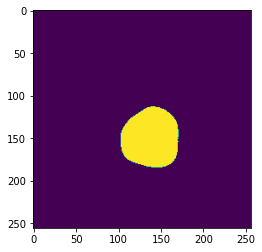

Labelnumber [5], Epoch [141/1000], Step [2/8], Loss: 803.2114,---------------------------------- Accuracy: 95.02%
Labelnumber [5], Epoch [142/1000], Step [2/8], Loss: 771.8737,---------------------------------- Accuracy: 95.62%
Labelnumber [5], Epoch [143/1000], Step [2/8], Loss: 851.0873,---------------------------------- Accuracy: 95.65%
Labelnumber [5], Epoch [144/1000], Step [2/8], Loss: 658.9054,---------------------------------- Accuracy: 95.37%
Labelnumber [5], Epoch [145/1000], Step [2/8], Loss: 757.4919,---------------------------------- Accuracy: 95.53%
Labelnumber [5], Epoch [146/1000], Step [2/8], Loss: 654.7596,---------------------------------- Accuracy: 95.59%
Labelnumber [5], Epoch [147/1000], Step [2/8], Loss: 654.2563,---------------------------------- Accuracy: 95.73%
Labelnumber [5], Epoch [148/1000], Step [2/8], Loss: 653.8848,---------------------------------- Accuracy: 95.58%
Labelnumber [5], Epoch [149/1000], Step [2/8], Loss: 653.6162,--------------------------

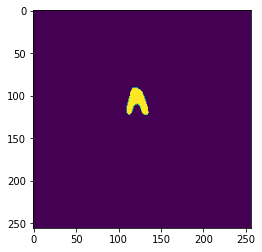

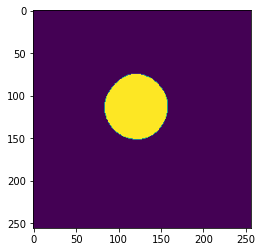

Labelnumber [5], Epoch [151/1000], Step [2/8], Loss: 708.7160,---------------------------------- Accuracy: 95.61%
Labelnumber [5], Epoch [152/1000], Step [2/8], Loss: 708.2558,---------------------------------- Accuracy: 95.76%
Labelnumber [5], Epoch [153/1000], Step [2/8], Loss: 652.3342,---------------------------------- Accuracy: 95.82%
Labelnumber [5], Epoch [154/1000], Step [2/8], Loss: 797.4534,---------------------------------- Accuracy: 95.59%
Labelnumber [5], Epoch [155/1000], Step [2/8], Loss: 651.5851,---------------------------------- Accuracy: 95.80%
Labelnumber [5], Epoch [156/1000], Step [2/8], Loss: 845.1411,---------------------------------- Accuracy: 95.81%
Labelnumber [5], Epoch [157/1000], Step [2/8], Loss: 752.1659,---------------------------------- Accuracy: 95.90%
Labelnumber [5], Epoch [158/1000], Step [2/8], Loss: 653.7047,---------------------------------- Accuracy: 96.03%
Labelnumber [5], Epoch [159/1000], Step [2/8], Loss: 653.3412,--------------------------

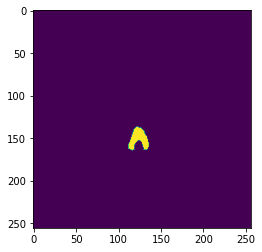

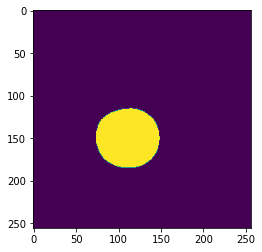

Labelnumber [5], Epoch [161/1000], Step [2/8], Loss: 695.4426,---------------------------------- Accuracy: 96.12%
Labelnumber [5], Epoch [162/1000], Step [2/8], Loss: 649.2067,---------------------------------- Accuracy: 96.14%
Labelnumber [5], Epoch [163/1000], Step [2/8], Loss: 695.4388,---------------------------------- Accuracy: 95.98%
Labelnumber [5], Epoch [164/1000], Step [2/8], Loss: 843.0232,---------------------------------- Accuracy: 95.81%
Labelnumber [5], Epoch [165/1000], Step [2/8], Loss: 651.0382,---------------------------------- Accuracy: 95.51%
Labelnumber [5], Epoch [166/1000], Step [2/8], Loss: 654.0233,---------------------------------- Accuracy: 95.92%
Labelnumber [5], Epoch [167/1000], Step [2/8], Loss: 706.2932,---------------------------------- Accuracy: 95.93%
Labelnumber [5], Epoch [168/1000], Step [2/8], Loss: 648.6978,---------------------------------- Accuracy: 96.24%
Labelnumber [5], Epoch [169/1000], Step [2/8], Loss: 651.3604,--------------------------

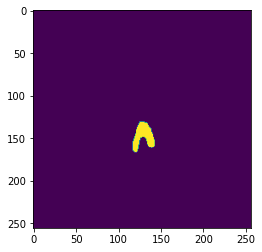

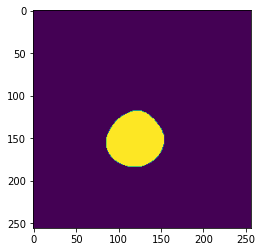

Labelnumber [5], Epoch [171/1000], Step [2/8], Loss: 646.8331,---------------------------------- Accuracy: 96.21%
Labelnumber [5], Epoch [172/1000], Step [2/8], Loss: 646.5201,---------------------------------- Accuracy: 96.41%
Labelnumber [5], Epoch [173/1000], Step [2/8], Loss: 759.8726,---------------------------------- Accuracy: 96.43%
Labelnumber [5], Epoch [174/1000], Step [2/8], Loss: 645.7036,---------------------------------- Accuracy: 96.35%
Labelnumber [5], Epoch [175/1000], Step [2/8], Loss: 691.3892,---------------------------------- Accuracy: 96.40%
Labelnumber [5], Epoch [176/1000], Step [2/8], Loss: 759.4700,---------------------------------- Accuracy: 96.32%
Labelnumber [5], Epoch [177/1000], Step [2/8], Loss: 789.1021,---------------------------------- Accuracy: 96.38%
Labelnumber [5], Epoch [178/1000], Step [2/8], Loss: 699.8910,---------------------------------- Accuracy: 96.59%
Labelnumber [5], Epoch [179/1000], Step [2/8], Loss: 690.1502,--------------------------

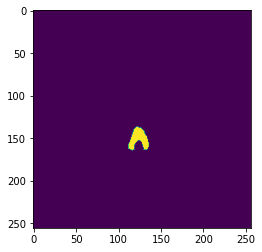

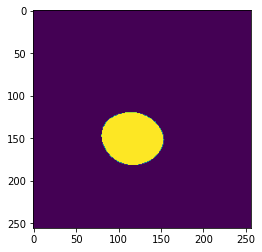

Labelnumber [5], Epoch [181/1000], Step [2/8], Loss: 787.5458,---------------------------------- Accuracy: 96.64%
Labelnumber [5], Epoch [182/1000], Step [2/8], Loss: 643.3718,---------------------------------- Accuracy: 96.53%
Labelnumber [5], Epoch [183/1000], Step [2/8], Loss: 643.2549,---------------------------------- Accuracy: 96.78%
Labelnumber [5], Epoch [184/1000], Step [2/8], Loss: 786.4220,---------------------------------- Accuracy: 96.72%
Labelnumber [5], Epoch [185/1000], Step [2/8], Loss: 645.2661,---------------------------------- Accuracy: 96.70%
Labelnumber [5], Epoch [186/1000], Step [2/8], Loss: 687.7097,---------------------------------- Accuracy: 96.68%
Labelnumber [5], Epoch [187/1000], Step [2/8], Loss: 833.7094,---------------------------------- Accuracy: 96.84%
Labelnumber [5], Epoch [188/1000], Step [2/8], Loss: 697.0242,---------------------------------- Accuracy: 96.92%
Labelnumber [5], Epoch [189/1000], Step [2/8], Loss: 644.1166,--------------------------

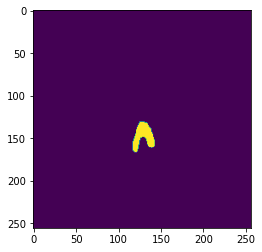

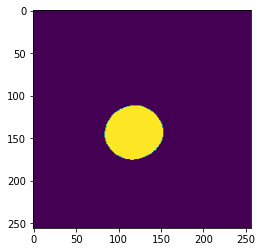

Labelnumber [5], Epoch [191/1000], Step [2/8], Loss: 754.0543,---------------------------------- Accuracy: 96.78%
Labelnumber [5], Epoch [192/1000], Step [2/8], Loss: 740.8082,---------------------------------- Accuracy: 96.89%
Labelnumber [5], Epoch [193/1000], Step [2/8], Loss: 694.9611,---------------------------------- Accuracy: 97.00%
Labelnumber [5], Epoch [194/1000], Step [2/8], Loss: 783.4067,---------------------------------- Accuracy: 96.94%
Labelnumber [5], Epoch [195/1000], Step [2/8], Loss: 685.3471,---------------------------------- Accuracy: 96.79%
Labelnumber [5], Epoch [196/1000], Step [2/8], Loss: 782.5356,---------------------------------- Accuracy: 97.07%
Labelnumber [5], Epoch [197/1000], Step [2/8], Loss: 642.0568,---------------------------------- Accuracy: 97.03%
Labelnumber [5], Epoch [198/1000], Step [2/8], Loss: 683.7983,---------------------------------- Accuracy: 97.06%
Labelnumber [5], Epoch [199/1000], Step [2/8], Loss: 750.8735,--------------------------

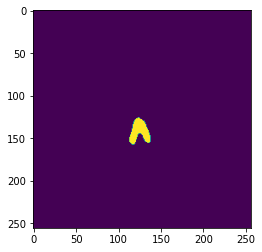

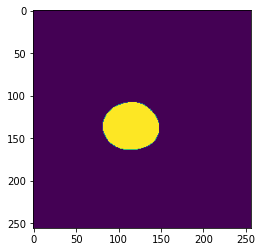

Labelnumber [5], Epoch [201/1000], Step [2/8], Loss: 780.5943,---------------------------------- Accuracy: 97.18%
Labelnumber [5], Epoch [202/1000], Step [2/8], Loss: 780.0668,---------------------------------- Accuracy: 97.17%
Labelnumber [5], Epoch [203/1000], Step [2/8], Loss: 682.3115,---------------------------------- Accuracy: 97.21%
Labelnumber [5], Epoch [204/1000], Step [2/8], Loss: 736.2349,---------------------------------- Accuracy: 97.20%
Labelnumber [5], Epoch [205/1000], Step [2/8], Loss: 639.2710,---------------------------------- Accuracy: 97.32%
Labelnumber [5], Epoch [206/1000], Step [2/8], Loss: 748.4080,---------------------------------- Accuracy: 97.34%
Labelnumber [5], Epoch [207/1000], Step [2/8], Loss: 778.5461,---------------------------------- Accuracy: 97.23%
Labelnumber [5], Epoch [208/1000], Step [2/8], Loss: 635.3988,---------------------------------- Accuracy: 97.38%
Labelnumber [5], Epoch [209/1000], Step [2/8], Loss: 734.5427,--------------------------

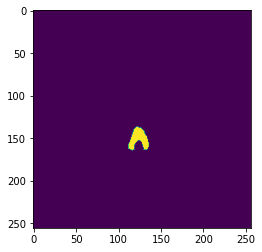

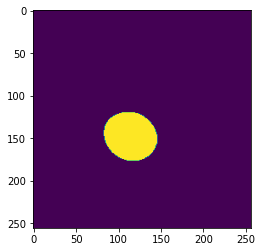

Labelnumber [5], Epoch [211/1000], Step [2/8], Loss: 689.1501,---------------------------------- Accuracy: 97.44%
Labelnumber [5], Epoch [212/1000], Step [2/8], Loss: 680.3797,---------------------------------- Accuracy: 97.08%
Labelnumber [5], Epoch [213/1000], Step [2/8], Loss: 681.8182,---------------------------------- Accuracy: 97.08%
Labelnumber [5], Epoch [214/1000], Step [2/8], Loss: 747.1264,---------------------------------- Accuracy: 97.05%
Labelnumber [5], Epoch [215/1000], Step [2/8], Loss: 735.0795,---------------------------------- Accuracy: 97.02%
Labelnumber [5], Epoch [216/1000], Step [2/8], Loss: 776.4809,---------------------------------- Accuracy: 97.51%
Labelnumber [5], Epoch [217/1000], Step [2/8], Loss: 732.4477,---------------------------------- Accuracy: 97.45%
Labelnumber [5], Epoch [218/1000], Step [2/8], Loss: 745.1194,---------------------------------- Accuracy: 97.53%
Labelnumber [5], Epoch [219/1000], Step [2/8], Loss: 635.3152,--------------------------

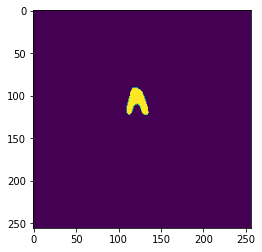

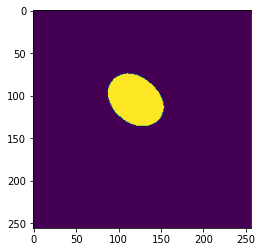

Labelnumber [5], Epoch [221/1000], Step [2/8], Loss: 631.4938,---------------------------------- Accuracy: 97.67%
Labelnumber [5], Epoch [222/1000], Step [2/8], Loss: 631.2543,---------------------------------- Accuracy: 97.70%
Labelnumber [5], Epoch [223/1000], Step [2/8], Loss: 820.9444,---------------------------------- Accuracy: 97.76%
Labelnumber [5], Epoch [224/1000], Step [2/8], Loss: 820.9051,---------------------------------- Accuracy: 97.73%
Labelnumber [5], Epoch [225/1000], Step [2/8], Loss: 630.2723,---------------------------------- Accuracy: 97.68%
Labelnumber [5], Epoch [226/1000], Step [2/8], Loss: 675.4739,---------------------------------- Accuracy: 97.71%
Labelnumber [5], Epoch [227/1000], Step [2/8], Loss: 728.8539,---------------------------------- Accuracy: 97.78%
Labelnumber [5], Epoch [228/1000], Step [2/8], Loss: 629.2816,---------------------------------- Accuracy: 97.83%
Labelnumber [5], Epoch [229/1000], Step [2/8], Loss: 740.9031,--------------------------

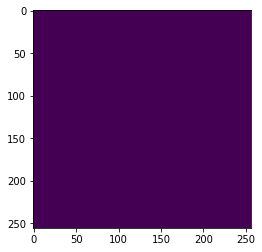

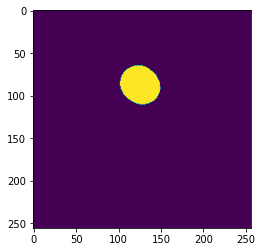

Labelnumber [5], Epoch [231/1000], Step [2/8], Loss: 684.1354,---------------------------------- Accuracy: 97.86%
Labelnumber [5], Epoch [232/1000], Step [2/8], Loss: 727.7328,---------------------------------- Accuracy: 97.80%
Labelnumber [5], Epoch [233/1000], Step [2/8], Loss: 631.4631,---------------------------------- Accuracy: 97.70%
Labelnumber [5], Epoch [234/1000], Step [2/8], Loss: 739.5673,---------------------------------- Accuracy: 97.77%
Labelnumber [5], Epoch [235/1000], Step [2/8], Loss: 740.1982,---------------------------------- Accuracy: 97.88%
Labelnumber [5], Epoch [236/1000], Step [2/8], Loss: 630.8935,---------------------------------- Accuracy: 97.70%
Labelnumber [5], Epoch [237/1000], Step [2/8], Loss: 626.9594,---------------------------------- Accuracy: 98.11%
Labelnumber [5], Epoch [238/1000], Step [2/8], Loss: 671.4302,---------------------------------- Accuracy: 97.96%
Labelnumber [5], Epoch [239/1000], Step [2/8], Loss: 767.5658,--------------------------

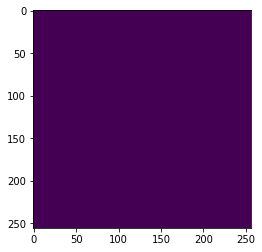

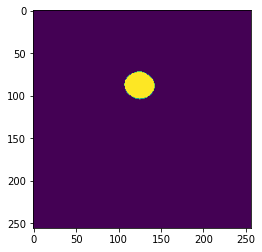

Labelnumber [5], Epoch [241/1000], Step [2/8], Loss: 766.9127,---------------------------------- Accuracy: 98.08%
Labelnumber [5], Epoch [242/1000], Step [2/8], Loss: 766.2825,---------------------------------- Accuracy: 98.11%
Labelnumber [5], Epoch [243/1000], Step [2/8], Loss: 735.8945,---------------------------------- Accuracy: 98.13%
Labelnumber [5], Epoch [244/1000], Step [2/8], Loss: 765.4163,---------------------------------- Accuracy: 98.19%
Labelnumber [5], Epoch [245/1000], Step [2/8], Loss: 623.6426,---------------------------------- Accuracy: 98.19%
Labelnumber [5], Epoch [246/1000], Step [2/8], Loss: 677.5859,---------------------------------- Accuracy: 98.20%
Labelnumber [5], Epoch [247/1000], Step [2/8], Loss: 626.1321,---------------------------------- Accuracy: 98.20%
Labelnumber [5], Epoch [248/1000], Step [2/8], Loss: 764.2534,---------------------------------- Accuracy: 98.16%
Labelnumber [5], Epoch [249/1000], Step [2/8], Loss: 734.6370,--------------------------

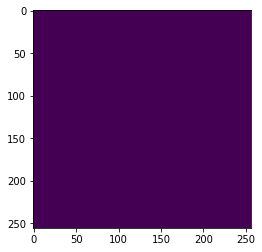

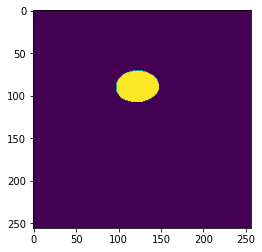

Labelnumber [5], Epoch [251/1000], Step [2/8], Loss: 666.7441,---------------------------------- Accuracy: 98.22%
Labelnumber [5], Epoch [252/1000], Step [2/8], Loss: 666.2079,---------------------------------- Accuracy: 98.28%
Labelnumber [5], Epoch [253/1000], Step [2/8], Loss: 809.3538,---------------------------------- Accuracy: 98.36%
Labelnumber [5], Epoch [254/1000], Step [2/8], Loss: 762.1230,---------------------------------- Accuracy: 98.35%
Labelnumber [5], Epoch [255/1000], Step [2/8], Loss: 623.1855,---------------------------------- Accuracy: 98.41%
Labelnumber [5], Epoch [256/1000], Step [2/8], Loss: 665.8395,---------------------------------- Accuracy: 98.37%
Labelnumber [5], Epoch [257/1000], Step [2/8], Loss: 620.0569,---------------------------------- Accuracy: 98.28%
Labelnumber [5], Epoch [258/1000], Step [2/8], Loss: 622.4362,---------------------------------- Accuracy: 98.29%
Labelnumber [5], Epoch [259/1000], Step [2/8], Loss: 673.0605,--------------------------

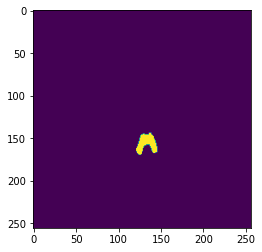

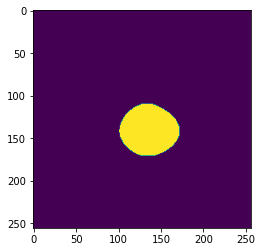

Labelnumber [5], Epoch [261/1000], Step [2/8], Loss: 673.2098,---------------------------------- Accuracy: 98.41%
Labelnumber [5], Epoch [262/1000], Step [2/8], Loss: 806.2222,---------------------------------- Accuracy: 98.43%
Labelnumber [5], Epoch [263/1000], Step [2/8], Loss: 757.9909,---------------------------------- Accuracy: 98.50%
Labelnumber [5], Epoch [264/1000], Step [2/8], Loss: 804.7825,---------------------------------- Accuracy: 98.53%
Labelnumber [5], Epoch [265/1000], Step [2/8], Loss: 670.1641,---------------------------------- Accuracy: 98.58%
Labelnumber [5], Epoch [266/1000], Step [2/8], Loss: 803.8668,---------------------------------- Accuracy: 98.50%
Labelnumber [5], Epoch [267/1000], Step [2/8], Loss: 618.7003,---------------------------------- Accuracy: 98.74%
Labelnumber [5], Epoch [268/1000], Step [2/8], Loss: 618.8331,---------------------------------- Accuracy: 98.58%
Labelnumber [5], Epoch [269/1000], Step [2/8], Loss: 716.2828,--------------------------

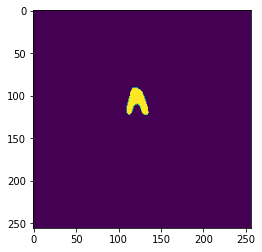

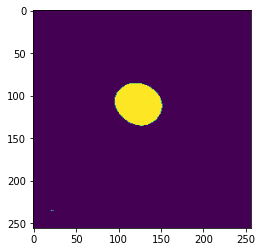

Labelnumber [5], Epoch [271/1000], Step [2/8], Loss: 758.3608,---------------------------------- Accuracy: 98.37%
Labelnumber [5], Epoch [272/1000], Step [2/8], Loss: 805.6750,---------------------------------- Accuracy: 98.29%
Labelnumber [5], Epoch [273/1000], Step [2/8], Loss: 713.1329,---------------------------------- Accuracy: 98.54%
Labelnumber [5], Epoch [274/1000], Step [2/8], Loss: 801.5910,---------------------------------- Accuracy: 98.64%
Labelnumber [5], Epoch [275/1000], Step [2/8], Loss: 667.3179,---------------------------------- Accuracy: 98.69%
Labelnumber [5], Epoch [276/1000], Step [2/8], Loss: 722.6194,---------------------------------- Accuracy: 98.79%
Labelnumber [5], Epoch [277/1000], Step [2/8], Loss: 752.3459,---------------------------------- Accuracy: 98.74%
Labelnumber [5], Epoch [278/1000], Step [2/8], Loss: 665.1092,---------------------------------- Accuracy: 98.77%
Labelnumber [5], Epoch [279/1000], Step [2/8], Loss: 720.8933,--------------------------

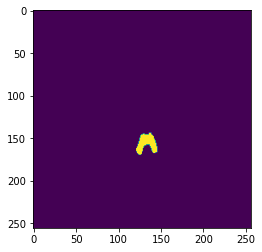

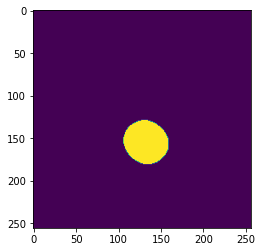

Labelnumber [5], Epoch [281/1000], Step [2/8], Loss: 749.5702,---------------------------------- Accuracy: 98.86%
Labelnumber [5], Epoch [282/1000], Step [2/8], Loss: 719.6610,---------------------------------- Accuracy: 98.91%
Labelnumber [5], Epoch [283/1000], Step [2/8], Loss: 661.7127,---------------------------------- Accuracy: 98.91%
Labelnumber [5], Epoch [284/1000], Step [2/8], Loss: 610.2026,---------------------------------- Accuracy: 98.98%
Labelnumber [5], Epoch [285/1000], Step [2/8], Loss: 747.4189,---------------------------------- Accuracy: 98.96%
Labelnumber [5], Epoch [286/1000], Step [2/8], Loss: 609.4189,---------------------------------- Accuracy: 98.88%
Labelnumber [5], Epoch [287/1000], Step [2/8], Loss: 794.1052,---------------------------------- Accuracy: 98.98%
Labelnumber [5], Epoch [288/1000], Step [2/8], Loss: 650.0065,---------------------------------- Accuracy: 98.94%
Labelnumber [5], Epoch [289/1000], Step [2/8], Loss: 664.0408,--------------------------

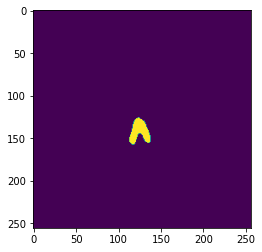

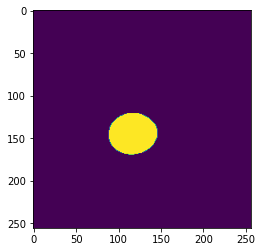

Labelnumber [5], Epoch [291/1000], Step [2/8], Loss: 652.2772,---------------------------------- Accuracy: 98.96%
Labelnumber [5], Epoch [292/1000], Step [2/8], Loss: 714.9185,---------------------------------- Accuracy: 98.94%
Labelnumber [5], Epoch [293/1000], Step [2/8], Loss: 650.2452,---------------------------------- Accuracy: 98.68%
Labelnumber [5], Epoch [294/1000], Step [2/8], Loss: 747.8958,---------------------------------- Accuracy: 98.54%
Labelnumber [5], Epoch [295/1000], Step [2/8], Loss: 648.3732,---------------------------------- Accuracy: 98.88%
Labelnumber [5], Epoch [296/1000], Step [2/8], Loss: 603.8804,---------------------------------- Accuracy: 99.06%
Labelnumber [5], Epoch [297/1000], Step [2/8], Loss: 712.0565,---------------------------------- Accuracy: 99.05%
Labelnumber [5], Epoch [298/1000], Step [2/8], Loss: 654.7470,---------------------------------- Accuracy: 99.11%
Labelnumber [5], Epoch [299/1000], Step [2/8], Loss: 709.8446,--------------------------

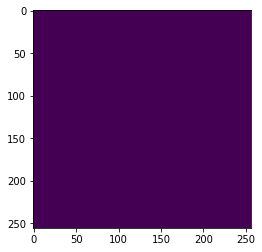

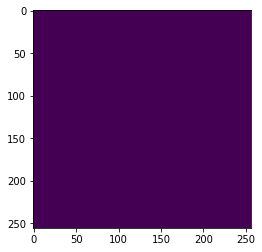

Labelnumber [5], Epoch [301/1000], Step [2/8], Loss: 642.3547,---------------------------------- Accuracy: 99.20%
Labelnumber [5], Epoch [302/1000], Step [2/8], Loss: 736.5969,---------------------------------- Accuracy: 99.25%
Labelnumber [5], Epoch [303/1000], Step [2/8], Loss: 736.0229,---------------------------------- Accuracy: 99.20%
Labelnumber [5], Epoch [304/1000], Step [2/8], Loss: 649.4402,---------------------------------- Accuracy: 99.18%
Labelnumber [5], Epoch [305/1000], Step [2/8], Loss: 598.4384,---------------------------------- Accuracy: 99.23%
Labelnumber [5], Epoch [306/1000], Step [2/8], Loss: 781.2754,---------------------------------- Accuracy: 99.18%
Labelnumber [5], Epoch [307/1000], Step [2/8], Loss: 690.8094,---------------------------------- Accuracy: 99.27%
Labelnumber [5], Epoch [308/1000], Step [2/8], Loss: 688.9920,---------------------------------- Accuracy: 99.32%
Labelnumber [5], Epoch [309/1000], Step [2/8], Loss: 594.0610,--------------------------

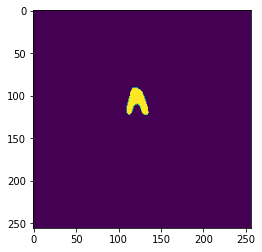

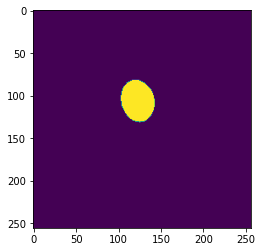

Labelnumber [5], Epoch [311/1000], Step [2/8], Loss: 633.1614,---------------------------------- Accuracy: 99.36%
Labelnumber [5], Epoch [312/1000], Step [2/8], Loss: 684.7885,---------------------------------- Accuracy: 99.41%
Labelnumber [5], Epoch [313/1000], Step [2/8], Loss: 590.0137,---------------------------------- Accuracy: 99.42%
Labelnumber [5], Epoch [314/1000], Step [2/8], Loss: 588.6302,---------------------------------- Accuracy: 99.42%
Labelnumber [5], Epoch [315/1000], Step [2/8], Loss: 724.4330,---------------------------------- Accuracy: 99.41%
Labelnumber [5], Epoch [316/1000], Step [2/8], Loss: 606.8066,---------------------------------- Accuracy: 97.95%
Labelnumber [5], Epoch [317/1000], Step [2/8], Loss: 734.8542,---------------------------------- Accuracy: 98.86%
Labelnumber [5], Epoch [318/1000], Step [2/8], Loss: 699.1898,---------------------------------- Accuracy: 99.10%
Labelnumber [5], Epoch [319/1000], Step [2/8], Loss: 633.1541,--------------------------

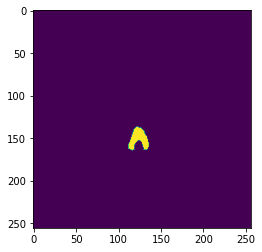

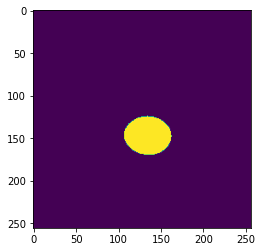

Labelnumber [5], Epoch [321/1000], Step [2/8], Loss: 583.8480,---------------------------------- Accuracy: 99.35%
Labelnumber [5], Epoch [322/1000], Step [2/8], Loss: 721.1072,---------------------------------- Accuracy: 99.39%
Labelnumber [5], Epoch [323/1000], Step [2/8], Loss: 690.6111,---------------------------------- Accuracy: 99.47%
Labelnumber [5], Epoch [324/1000], Step [2/8], Loss: 717.2582,---------------------------------- Accuracy: 99.50%
Labelnumber [5], Epoch [325/1000], Step [2/8], Loss: 576.5333,---------------------------------- Accuracy: 99.52%
Labelnumber [5], Epoch [326/1000], Step [2/8], Loss: 618.8415,---------------------------------- Accuracy: 99.53%
Labelnumber [5], Epoch [327/1000], Step [2/8], Loss: 682.2509,---------------------------------- Accuracy: 99.55%
Labelnumber [5], Epoch [328/1000], Step [2/8], Loss: 615.3046,---------------------------------- Accuracy: 99.58%
Labelnumber [5], Epoch [329/1000], Step [2/8], Loss: 756.6011,--------------------------

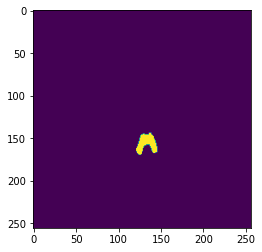

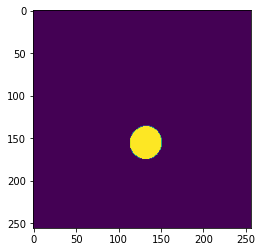

Labelnumber [5], Epoch [331/1000], Step [2/8], Loss: 678.4033,---------------------------------- Accuracy: 99.48%
Labelnumber [5], Epoch [332/1000], Step [2/8], Loss: 704.2402,---------------------------------- Accuracy: 99.60%
Labelnumber [5], Epoch [333/1000], Step [2/8], Loss: 677.1722,---------------------------------- Accuracy: 99.58%
Labelnumber [5], Epoch [334/1000], Step [2/8], Loss: 679.1544,---------------------------------- Accuracy: 99.51%
Labelnumber [5], Epoch [335/1000], Step [2/8], Loss: 750.4724,---------------------------------- Accuracy: 99.59%
Labelnumber [5], Epoch [336/1000], Step [2/8], Loss: 562.3105,---------------------------------- Accuracy: 99.61%
Labelnumber [5], Epoch [337/1000], Step [2/8], Loss: 600.5507,---------------------------------- Accuracy: 99.68%
Labelnumber [5], Epoch [338/1000], Step [2/8], Loss: 557.7368,---------------------------------- Accuracy: 99.67%
Labelnumber [5], Epoch [339/1000], Step [2/8], Loss: 689.0605,--------------------------

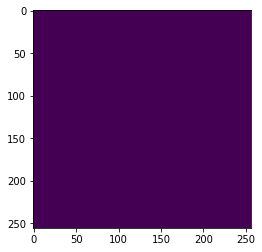

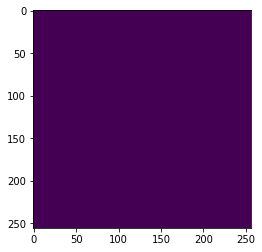

Labelnumber [5], Epoch [341/1000], Step [2/8], Loss: 641.6633,---------------------------------- Accuracy: 99.71%
Labelnumber [5], Epoch [342/1000], Step [2/8], Loss: 663.4849,---------------------------------- Accuracy: 99.70%
Labelnumber [5], Epoch [343/1000], Step [2/8], Loss: 660.2281,---------------------------------- Accuracy: 99.21%
Labelnumber [5], Epoch [344/1000], Step [2/8], Loss: 614.2191,---------------------------------- Accuracy: 99.55%
Labelnumber [5], Epoch [345/1000], Step [2/8], Loss: 558.7144,---------------------------------- Accuracy: 99.53%
Labelnumber [5], Epoch [346/1000], Step [2/8], Loss: 680.0521,---------------------------------- Accuracy: 99.65%
Labelnumber [5], Epoch [347/1000], Step [2/8], Loss: 588.7977,---------------------------------- Accuracy: 99.70%
Labelnumber [5], Epoch [348/1000], Step [2/8], Loss: 644.7137,---------------------------------- Accuracy: 99.69%
Labelnumber [5], Epoch [349/1000], Step [2/8], Loss: 583.6202,--------------------------

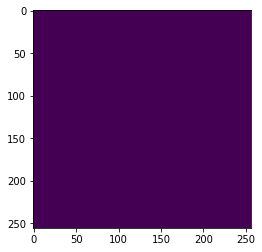

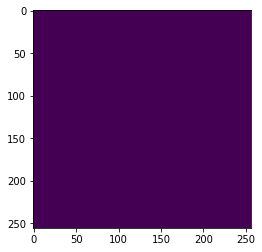

Labelnumber [5], Epoch [351/1000], Step [2/8], Loss: 571.2148,---------------------------------- Accuracy: 99.75%
Labelnumber [5], Epoch [352/1000], Step [2/8], Loss: 575.5113,---------------------------------- Accuracy: 99.76%
Labelnumber [5], Epoch [353/1000], Step [2/8], Loss: 699.9274,---------------------------------- Accuracy: 99.79%
Labelnumber [5], Epoch [354/1000], Step [2/8], Loss: 607.3167,---------------------------------- Accuracy: 99.82%
Labelnumber [5], Epoch [355/1000], Step [2/8], Loss: 601.1224,---------------------------------- Accuracy: 99.80%
Labelnumber [5], Epoch [356/1000], Step [2/8], Loss: 616.3123,---------------------------------- Accuracy: 99.83%
Labelnumber [5], Epoch [357/1000], Step [2/8], Loss: 686.0976,---------------------------------- Accuracy: 99.78%
Labelnumber [5], Epoch [358/1000], Step [2/8], Loss: 546.5724,---------------------------------- Accuracy: 99.80%
Labelnumber [5], Epoch [359/1000], Step [2/8], Loss: 603.0474,--------------------------

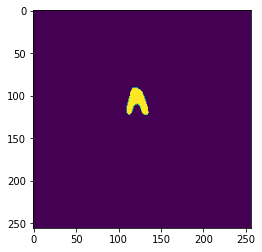

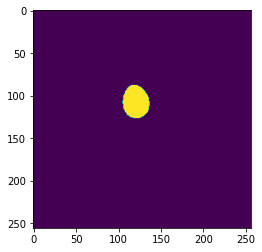

Labelnumber [5], Epoch [361/1000], Step [2/8], Loss: 675.4419,---------------------------------- Accuracy: 99.79%
Labelnumber [5], Epoch [362/1000], Step [2/8], Loss: 623.0742,---------------------------------- Accuracy: 99.83%
Labelnumber [5], Epoch [363/1000], Step [2/8], Loss: 575.9233,---------------------------------- Accuracy: 99.86%
Labelnumber [5], Epoch [364/1000], Step [2/8], Loss: 649.0442,---------------------------------- Accuracy: 99.84%
Labelnumber [5], Epoch [365/1000], Step [2/8], Loss: 566.4825,---------------------------------- Accuracy: 99.87%
Labelnumber [5], Epoch [366/1000], Step [2/8], Loss: 507.8782,---------------------------------- Accuracy: 99.85%
Labelnumber [5], Epoch [367/1000], Step [2/8], Loss: 561.2614,---------------------------------- Accuracy: 99.83%
Labelnumber [5], Epoch [368/1000], Step [2/8], Loss: 470.3141,---------------------------------- Accuracy: 99.86%
Labelnumber [5], Epoch [369/1000], Step [2/8], Loss: 580.3113,--------------------------

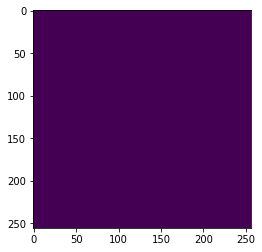

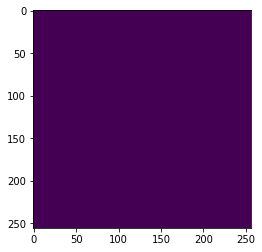

Labelnumber [5], Epoch [371/1000], Step [2/8], Loss: 443.9277,---------------------------------- Accuracy: 99.87%
Labelnumber [5], Epoch [372/1000], Step [2/8], Loss: 475.8734,---------------------------------- Accuracy: 99.88%
Labelnumber [5], Epoch [373/1000], Step [2/8], Loss: 555.9416,---------------------------------- Accuracy: 99.88%
Labelnumber [5], Epoch [374/1000], Step [2/8], Loss: 517.1429,---------------------------------- Accuracy: 99.90%
Labelnumber [5], Epoch [375/1000], Step [2/8], Loss: 452.6890,---------------------------------- Accuracy: 99.91%
Labelnumber [5], Epoch [376/1000], Step [2/8], Loss: 530.6426,---------------------------------- Accuracy: 99.89%
Labelnumber [5], Epoch [377/1000], Step [2/8], Loss: 493.2766,---------------------------------- Accuracy: 99.91%
Labelnumber [5], Epoch [378/1000], Step [2/8], Loss: 589.9080,---------------------------------- Accuracy: 99.89%
Labelnumber [5], Epoch [379/1000], Step [2/8], Loss: 394.2512,--------------------------

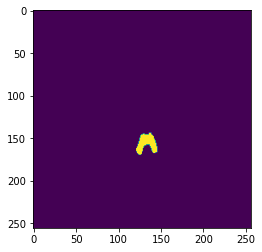

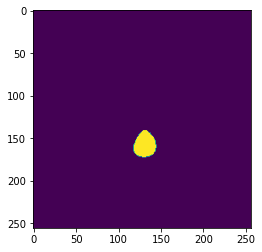

Labelnumber [5], Epoch [381/1000], Step [2/8], Loss: 489.8565,---------------------------------- Accuracy: 99.91%
Labelnumber [5], Epoch [382/1000], Step [2/8], Loss: 535.7173,---------------------------------- Accuracy: 99.92%
Labelnumber [5], Epoch [383/1000], Step [2/8], Loss: 447.5953,---------------------------------- Accuracy: 99.91%
Labelnumber [5], Epoch [384/1000], Step [2/8], Loss: 550.1111,---------------------------------- Accuracy: 99.91%
Labelnumber [5], Epoch [385/1000], Step [2/8], Loss: 397.5080,---------------------------------- Accuracy: 99.91%
Labelnumber [5], Epoch [386/1000], Step [2/8], Loss: 348.9305,---------------------------------- Accuracy: 99.93%
Labelnumber [5], Epoch [387/1000], Step [2/8], Loss: 419.9386,---------------------------------- Accuracy: 99.91%
Labelnumber [5], Epoch [388/1000], Step [2/8], Loss: 342.5560,---------------------------------- Accuracy: 99.93%
Labelnumber [5], Epoch [389/1000], Step [2/8], Loss: 331.0532,--------------------------

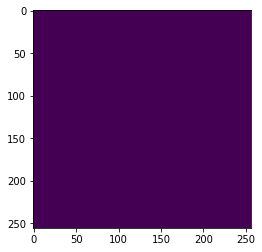

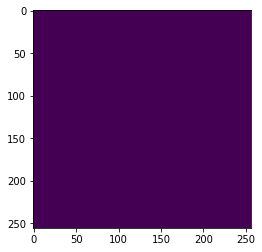

Labelnumber [5], Epoch [391/1000], Step [2/8], Loss: 448.8826,---------------------------------- Accuracy: 99.82%
Labelnumber [5], Epoch [392/1000], Step [2/8], Loss: 397.2966,---------------------------------- Accuracy: 99.85%
Labelnumber [5], Epoch [393/1000], Step [2/8], Loss: 408.7094,---------------------------------- Accuracy: 99.91%
Labelnumber [5], Epoch [394/1000], Step [2/8], Loss: 450.3586,---------------------------------- Accuracy: 99.93%
Labelnumber [5], Epoch [395/1000], Step [2/8], Loss: 390.3395,---------------------------------- Accuracy: 99.94%
Labelnumber [5], Epoch [396/1000], Step [2/8], Loss: 313.1647,---------------------------------- Accuracy: 99.94%
Labelnumber [5], Epoch [397/1000], Step [2/8], Loss: 324.9984,---------------------------------- Accuracy: 99.92%
Labelnumber [5], Epoch [398/1000], Step [2/8], Loss: 356.9837,---------------------------------- Accuracy: 99.95%
Labelnumber [5], Epoch [399/1000], Step [2/8], Loss: 376.8137,--------------------------

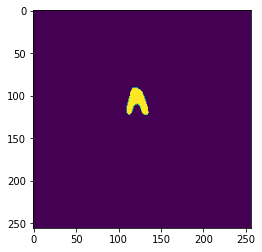

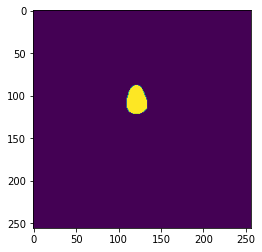

Labelnumber [5], Epoch [401/1000], Step [2/8], Loss: 398.8084,---------------------------------- Accuracy: 99.94%
Labelnumber [5], Epoch [402/1000], Step [2/8], Loss: 315.5397,---------------------------------- Accuracy: 99.94%
Labelnumber [5], Epoch [403/1000], Step [2/8], Loss: 383.2557,---------------------------------- Accuracy: 99.94%
Labelnumber [5], Epoch [404/1000], Step [2/8], Loss: 293.4672,---------------------------------- Accuracy: 99.94%
Labelnumber [5], Epoch [405/1000], Step [2/8], Loss: 368.4599,---------------------------------- Accuracy: 99.95%
Labelnumber [5], Epoch [406/1000], Step [2/8], Loss: 283.8229,---------------------------------- Accuracy: 99.94%
Labelnumber [5], Epoch [407/1000], Step [2/8], Loss: 280.5361,---------------------------------- Accuracy: 99.95%
Labelnumber [5], Epoch [408/1000], Step [2/8], Loss: 335.6921,---------------------------------- Accuracy: 99.95%
Labelnumber [5], Epoch [409/1000], Step [2/8], Loss: 294.3758,--------------------------

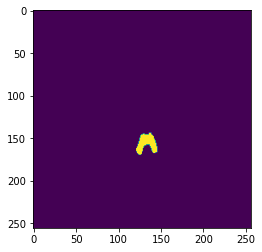

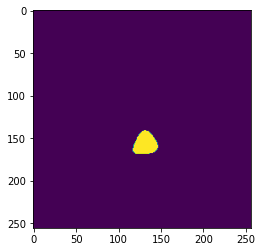

Labelnumber [5], Epoch [411/1000], Step [2/8], Loss: 244.9884,---------------------------------- Accuracy: 99.96%
Labelnumber [5], Epoch [412/1000], Step [2/8], Loss: 231.5105,---------------------------------- Accuracy: 99.96%
Labelnumber [5], Epoch [413/1000], Step [2/8], Loss: 283.1256,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [414/1000], Step [2/8], Loss: 226.7454,---------------------------------- Accuracy: 99.96%
Labelnumber [5], Epoch [415/1000], Step [2/8], Loss: 212.7634,---------------------------------- Accuracy: 99.96%
Labelnumber [5], Epoch [416/1000], Step [2/8], Loss: 238.3412,---------------------------------- Accuracy: 99.96%
Labelnumber [5], Epoch [417/1000], Step [2/8], Loss: 295.5407,---------------------------------- Accuracy: 99.96%
Labelnumber [5], Epoch [418/1000], Step [2/8], Loss: 248.3328,---------------------------------- Accuracy: 99.95%
Labelnumber [5], Epoch [419/1000], Step [2/8], Loss: 260.9201,--------------------------

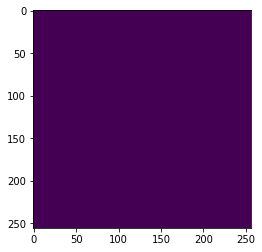

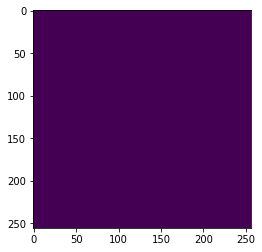

Labelnumber [5], Epoch [421/1000], Step [2/8], Loss: 256.9050,---------------------------------- Accuracy: 99.96%
Labelnumber [5], Epoch [422/1000], Step [2/8], Loss: 226.6715,---------------------------------- Accuracy: 99.96%
Labelnumber [5], Epoch [423/1000], Step [2/8], Loss: 184.6544,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [424/1000], Step [2/8], Loss: 219.0074,---------------------------------- Accuracy: 99.95%
Labelnumber [5], Epoch [425/1000], Step [2/8], Loss: 226.2645,---------------------------------- Accuracy: 99.95%
Labelnumber [5], Epoch [426/1000], Step [2/8], Loss: 295.9743,---------------------------------- Accuracy: 99.93%
Labelnumber [5], Epoch [427/1000], Step [2/8], Loss: 206.4900,---------------------------------- Accuracy: 99.96%
Labelnumber [5], Epoch [428/1000], Step [2/8], Loss: 255.4368,---------------------------------- Accuracy: 99.95%
Labelnumber [5], Epoch [429/1000], Step [2/8], Loss: 186.0315,--------------------------

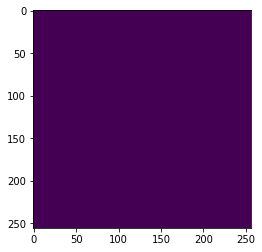

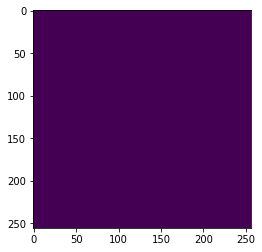

Labelnumber [5], Epoch [431/1000], Step [2/8], Loss: 247.8892,---------------------------------- Accuracy: 99.96%
Labelnumber [5], Epoch [432/1000], Step [2/8], Loss: 167.3759,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [433/1000], Step [2/8], Loss: 211.2031,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [434/1000], Step [2/8], Loss: 229.8959,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [435/1000], Step [2/8], Loss: 269.0139,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [436/1000], Step [2/8], Loss: 197.1960,---------------------------------- Accuracy: 99.96%
Labelnumber [5], Epoch [437/1000], Step [2/8], Loss: 268.4631,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [438/1000], Step [2/8], Loss: 210.0454,---------------------------------- Accuracy: 99.96%
Labelnumber [5], Epoch [439/1000], Step [2/8], Loss: 217.8401,--------------------------

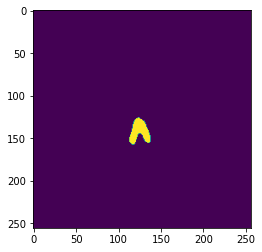

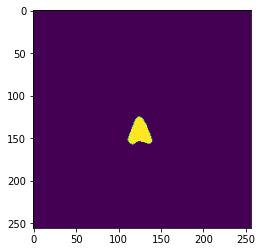

Labelnumber [5], Epoch [441/1000], Step [2/8], Loss: 208.1035,---------------------------------- Accuracy: 99.96%
Labelnumber [5], Epoch [442/1000], Step [2/8], Loss: 173.0876,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [443/1000], Step [2/8], Loss: 166.9396,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [444/1000], Step [2/8], Loss: 161.3707,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [445/1000], Step [2/8], Loss: 213.9678,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [446/1000], Step [2/8], Loss: 255.8018,---------------------------------- Accuracy: 99.96%
Labelnumber [5], Epoch [447/1000], Step [2/8], Loss: 174.5199,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [448/1000], Step [2/8], Loss: 157.7529,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [449/1000], Step [2/8], Loss: 140.7669,--------------------------

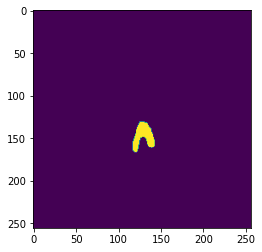

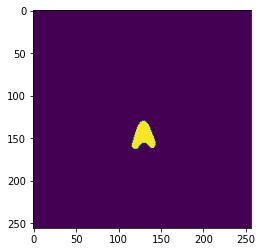

Labelnumber [5], Epoch [451/1000], Step [2/8], Loss: 153.6114,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [452/1000], Step [2/8], Loss: 142.6195,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [453/1000], Step [2/8], Loss: 170.3278,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [454/1000], Step [2/8], Loss: 137.0773,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [455/1000], Step [2/8], Loss: 147.5221,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [456/1000], Step [2/8], Loss: 215.3806,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [457/1000], Step [2/8], Loss: 148.6985,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [458/1000], Step [2/8], Loss: 198.6748,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [459/1000], Step [2/8], Loss: 142.1969,--------------------------

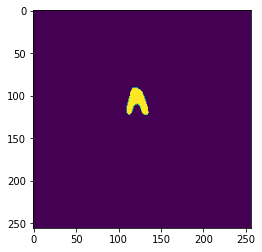

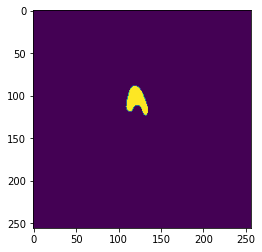

Labelnumber [5], Epoch [461/1000], Step [2/8], Loss: 143.5212,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [462/1000], Step [2/8], Loss: 156.3135,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [463/1000], Step [2/8], Loss: 152.3788,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [464/1000], Step [2/8], Loss: 145.1119,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [465/1000], Step [2/8], Loss: 168.8040,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [466/1000], Step [2/8], Loss: 148.0917,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [467/1000], Step [2/8], Loss: 136.6714,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [468/1000], Step [2/8], Loss: 118.4615,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [469/1000], Step [2/8], Loss: 153.8740,--------------------------

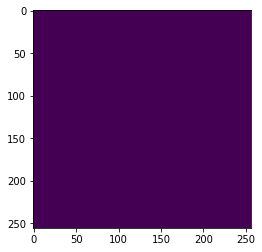

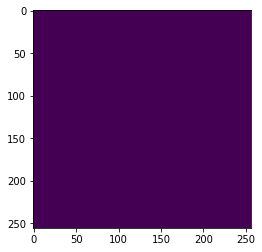

Labelnumber [5], Epoch [471/1000], Step [2/8], Loss: 104.4609,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [472/1000], Step [2/8], Loss: 164.7332,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [473/1000], Step [2/8], Loss: 144.1188,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [474/1000], Step [2/8], Loss: 126.6532,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [475/1000], Step [2/8], Loss: 138.1046,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [476/1000], Step [2/8], Loss: 124.1849,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [477/1000], Step [2/8], Loss: 150.8333,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [478/1000], Step [2/8], Loss: 144.3119,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [479/1000], Step [2/8], Loss: 122.9966,--------------------------

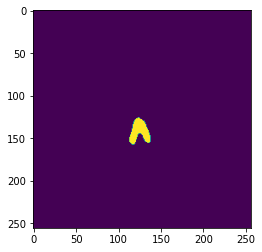

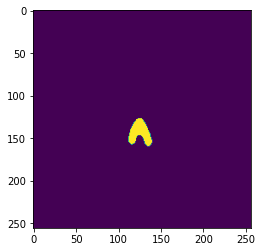

Labelnumber [5], Epoch [481/1000], Step [2/8], Loss: 103.3598,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [482/1000], Step [2/8], Loss: 131.6170,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [483/1000], Step [2/8], Loss: 111.3478,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [484/1000], Step [2/8], Loss: 95.9704,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [485/1000], Step [2/8], Loss: 96.5507,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [486/1000], Step [2/8], Loss: 118.2168,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [487/1000], Step [2/8], Loss: 140.3567,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [488/1000], Step [2/8], Loss: 134.2917,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [489/1000], Step [2/8], Loss: 113.8571,----------------------------

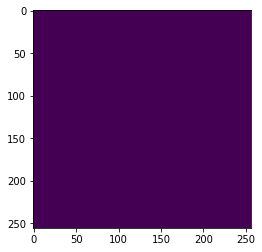

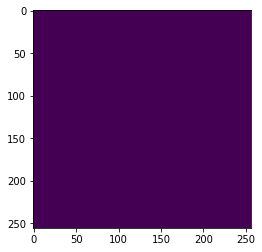

Labelnumber [5], Epoch [491/1000], Step [2/8], Loss: 143.8040,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [492/1000], Step [2/8], Loss: 116.7567,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [493/1000], Step [2/8], Loss: 109.2625,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [494/1000], Step [2/8], Loss: 111.5879,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [495/1000], Step [2/8], Loss: 85.0659,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [496/1000], Step [2/8], Loss: 157.0937,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [497/1000], Step [2/8], Loss: 80.1548,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [498/1000], Step [2/8], Loss: 123.1333,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [499/1000], Step [2/8], Loss: 134.9621,----------------------------

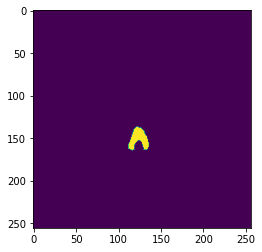

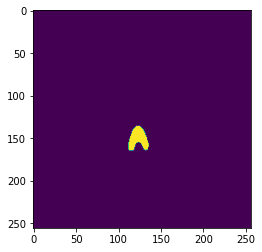

Labelnumber [5], Epoch [501/1000], Step [2/8], Loss: 134.6589,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [502/1000], Step [2/8], Loss: 87.9883,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [503/1000], Step [2/8], Loss: 93.4813,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [504/1000], Step [2/8], Loss: 98.1692,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [505/1000], Step [2/8], Loss: 85.2756,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [506/1000], Step [2/8], Loss: 115.9706,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [507/1000], Step [2/8], Loss: 109.5821,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [508/1000], Step [2/8], Loss: 101.6480,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [509/1000], Step [2/8], Loss: 98.4718,-------------------------------

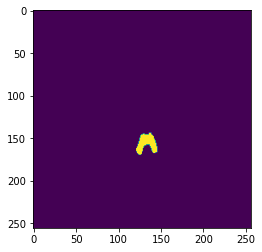

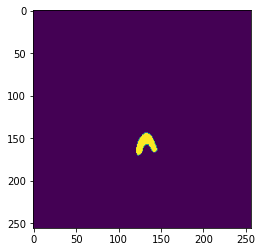

Labelnumber [5], Epoch [511/1000], Step [2/8], Loss: 87.8073,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [512/1000], Step [2/8], Loss: 93.0719,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [513/1000], Step [2/8], Loss: 90.4954,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [514/1000], Step [2/8], Loss: 120.4077,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [515/1000], Step [2/8], Loss: 88.0714,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [516/1000], Step [2/8], Loss: 117.6134,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [517/1000], Step [2/8], Loss: 119.4645,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [518/1000], Step [2/8], Loss: 148.8753,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [519/1000], Step [2/8], Loss: 101.0536,------------------------------

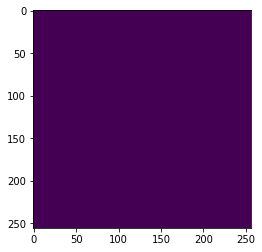

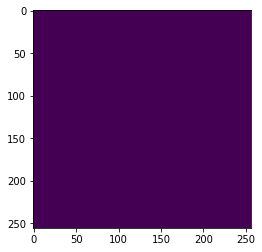

Labelnumber [5], Epoch [521/1000], Step [2/8], Loss: 99.6117,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [522/1000], Step [2/8], Loss: 91.1628,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [523/1000], Step [2/8], Loss: 115.7514,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [524/1000], Step [2/8], Loss: 84.2083,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [525/1000], Step [2/8], Loss: 94.2065,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [526/1000], Step [2/8], Loss: 126.1988,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [527/1000], Step [2/8], Loss: 104.3618,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [528/1000], Step [2/8], Loss: 80.4970,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [529/1000], Step [2/8], Loss: 102.1426,-------------------------------

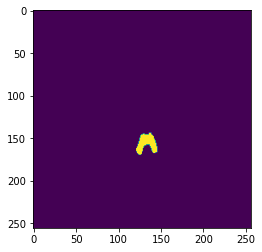

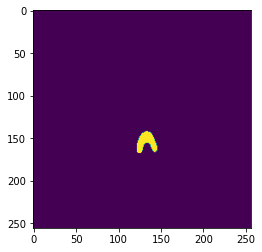

Labelnumber [5], Epoch [531/1000], Step [2/8], Loss: 86.0732,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [532/1000], Step [2/8], Loss: 97.2210,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [533/1000], Step [2/8], Loss: 85.3142,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [534/1000], Step [2/8], Loss: 110.2949,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [535/1000], Step [2/8], Loss: 138.6091,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [536/1000], Step [2/8], Loss: 87.4037,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [537/1000], Step [2/8], Loss: 79.1108,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [538/1000], Step [2/8], Loss: 118.1281,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [539/1000], Step [2/8], Loss: 77.9168,--------------------------------

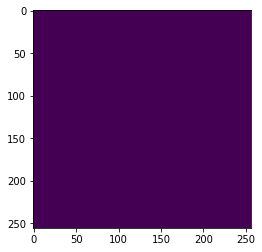

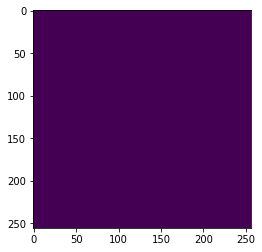

Labelnumber [5], Epoch [541/1000], Step [2/8], Loss: 82.0270,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [542/1000], Step [2/8], Loss: 80.0114,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [543/1000], Step [2/8], Loss: 103.9115,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [544/1000], Step [2/8], Loss: 94.6503,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [545/1000], Step [2/8], Loss: 83.3228,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [546/1000], Step [2/8], Loss: 73.1827,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [547/1000], Step [2/8], Loss: 91.2552,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [548/1000], Step [2/8], Loss: 63.1792,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [549/1000], Step [2/8], Loss: 70.1749,----------------------------------

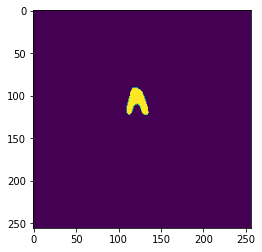

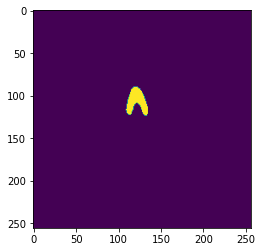

Labelnumber [5], Epoch [551/1000], Step [2/8], Loss: 81.5310,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [552/1000], Step [2/8], Loss: 114.6422,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [553/1000], Step [2/8], Loss: 79.4577,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [554/1000], Step [2/8], Loss: 69.5788,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [555/1000], Step [2/8], Loss: 73.2649,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [556/1000], Step [2/8], Loss: 78.3427,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [557/1000], Step [2/8], Loss: 96.9493,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [558/1000], Step [2/8], Loss: 98.8329,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [559/1000], Step [2/8], Loss: 82.7709,----------------------------------

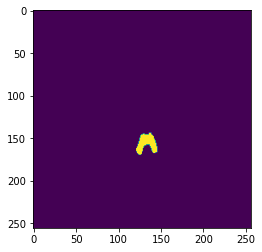

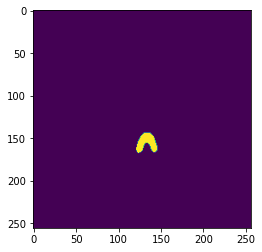

Labelnumber [5], Epoch [561/1000], Step [2/8], Loss: 127.1767,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [562/1000], Step [2/8], Loss: 82.3606,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [563/1000], Step [2/8], Loss: 92.8989,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [564/1000], Step [2/8], Loss: 70.7823,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [565/1000], Step [2/8], Loss: 77.4385,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [566/1000], Step [2/8], Loss: 79.8835,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [567/1000], Step [2/8], Loss: 75.2666,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [568/1000], Step [2/8], Loss: 61.1167,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [569/1000], Step [2/8], Loss: 72.0759,----------------------------------

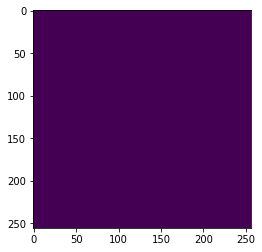

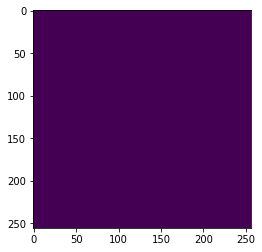

Labelnumber [5], Epoch [571/1000], Step [2/8], Loss: 133.7771,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [572/1000], Step [2/8], Loss: 66.7025,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [573/1000], Step [2/8], Loss: 80.0072,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [574/1000], Step [2/8], Loss: 72.4417,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [575/1000], Step [2/8], Loss: 84.0504,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [576/1000], Step [2/8], Loss: 76.2538,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [577/1000], Step [2/8], Loss: 86.3225,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [578/1000], Step [2/8], Loss: 60.8105,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [579/1000], Step [2/8], Loss: 88.4889,----------------------------------

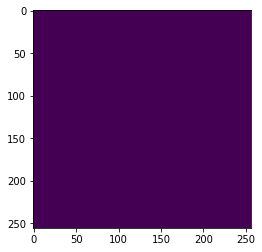

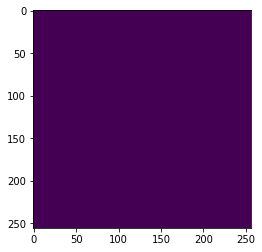

Labelnumber [5], Epoch [581/1000], Step [2/8], Loss: 63.6423,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [582/1000], Step [2/8], Loss: 64.5477,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [583/1000], Step [2/8], Loss: 83.9576,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [584/1000], Step [2/8], Loss: 108.8190,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [585/1000], Step [2/8], Loss: 79.2538,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [586/1000], Step [2/8], Loss: 64.0416,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [587/1000], Step [2/8], Loss: 67.7854,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [588/1000], Step [2/8], Loss: 61.0302,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [589/1000], Step [2/8], Loss: 70.8820,----------------------------------

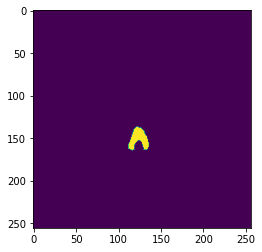

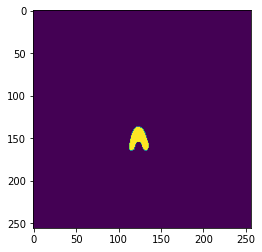

Labelnumber [5], Epoch [591/1000], Step [2/8], Loss: 70.1274,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [592/1000], Step [2/8], Loss: 85.2442,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [593/1000], Step [2/8], Loss: 68.7475,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [594/1000], Step [2/8], Loss: 68.9906,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [595/1000], Step [2/8], Loss: 72.4842,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [596/1000], Step [2/8], Loss: 66.3456,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [597/1000], Step [2/8], Loss: 72.8548,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [598/1000], Step [2/8], Loss: 53.2260,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [599/1000], Step [2/8], Loss: 84.3849,---------------------------------- 

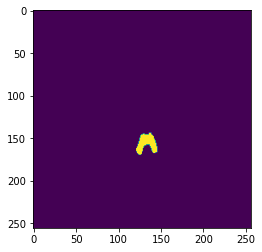

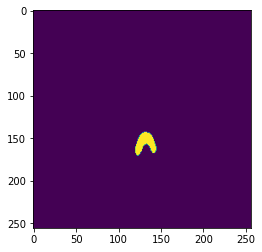

Labelnumber [5], Epoch [601/1000], Step [2/8], Loss: 75.8896,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [602/1000], Step [2/8], Loss: 69.6076,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [603/1000], Step [2/8], Loss: 77.2255,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [604/1000], Step [2/8], Loss: 79.1110,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [605/1000], Step [2/8], Loss: 69.2571,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [606/1000], Step [2/8], Loss: 63.4835,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [607/1000], Step [2/8], Loss: 92.8617,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [608/1000], Step [2/8], Loss: 66.2424,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [609/1000], Step [2/8], Loss: 66.2271,---------------------------------- 

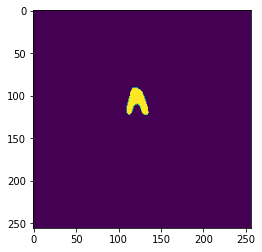

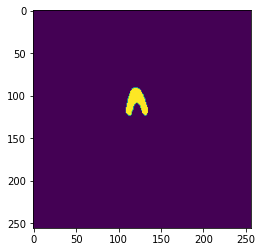

Labelnumber [5], Epoch [611/1000], Step [2/8], Loss: 74.3030,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [612/1000], Step [2/8], Loss: 63.2724,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [613/1000], Step [2/8], Loss: 65.2593,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [614/1000], Step [2/8], Loss: 57.2630,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [615/1000], Step [2/8], Loss: 65.9087,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [616/1000], Step [2/8], Loss: 70.7747,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [617/1000], Step [2/8], Loss: 72.2279,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [618/1000], Step [2/8], Loss: 63.0707,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [619/1000], Step [2/8], Loss: 102.8140,----------------------------------

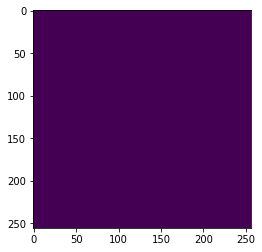

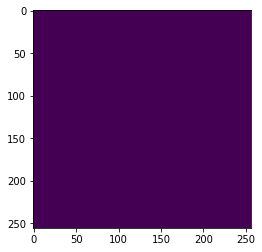

Labelnumber [5], Epoch [621/1000], Step [2/8], Loss: 92.8924,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [622/1000], Step [2/8], Loss: 103.9577,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [623/1000], Step [2/8], Loss: 60.4749,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [624/1000], Step [2/8], Loss: 70.2807,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [625/1000], Step [2/8], Loss: 50.4114,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [626/1000], Step [2/8], Loss: 69.4218,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [627/1000], Step [2/8], Loss: 57.8888,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [628/1000], Step [2/8], Loss: 77.0410,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [629/1000], Step [2/8], Loss: 67.2792,----------------------------------

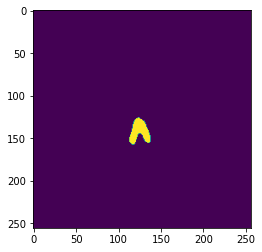

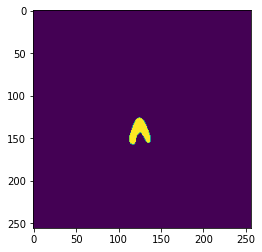

Labelnumber [5], Epoch [631/1000], Step [2/8], Loss: 72.9217,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [632/1000], Step [2/8], Loss: 65.3023,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [633/1000], Step [2/8], Loss: 74.8067,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [634/1000], Step [2/8], Loss: 63.9908,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [635/1000], Step [2/8], Loss: 70.0368,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [636/1000], Step [2/8], Loss: 66.6035,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [637/1000], Step [2/8], Loss: 75.7147,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [638/1000], Step [2/8], Loss: 91.3857,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [639/1000], Step [2/8], Loss: 55.1232,---------------------------------- 

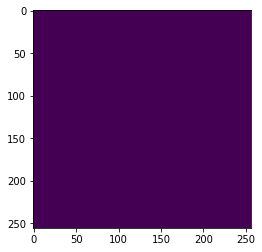

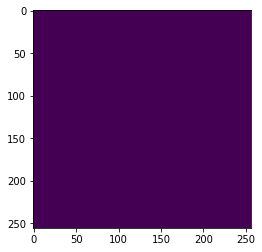

Labelnumber [5], Epoch [641/1000], Step [2/8], Loss: 64.3310,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [642/1000], Step [2/8], Loss: 72.6432,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [643/1000], Step [2/8], Loss: 58.7469,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [644/1000], Step [2/8], Loss: 67.0519,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [645/1000], Step [2/8], Loss: 53.5102,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [646/1000], Step [2/8], Loss: 59.3775,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [647/1000], Step [2/8], Loss: 70.5162,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [648/1000], Step [2/8], Loss: 51.3471,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [649/1000], Step [2/8], Loss: 56.3934,---------------------------------- 

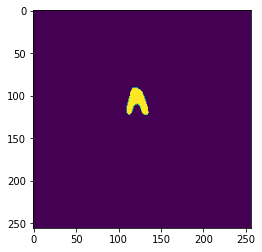

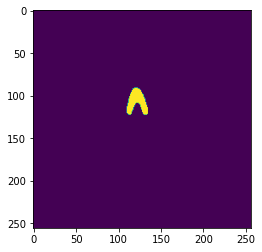

Labelnumber [5], Epoch [651/1000], Step [2/8], Loss: 51.6785,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [652/1000], Step [2/8], Loss: 67.2170,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [653/1000], Step [2/8], Loss: 55.8972,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [654/1000], Step [2/8], Loss: 52.8051,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [655/1000], Step [2/8], Loss: 56.4202,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [656/1000], Step [2/8], Loss: 74.8485,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [657/1000], Step [2/8], Loss: 73.1922,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [658/1000], Step [2/8], Loss: 48.3751,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [659/1000], Step [2/8], Loss: 53.9694,---------------------------------- 

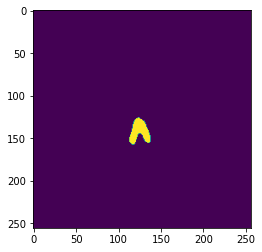

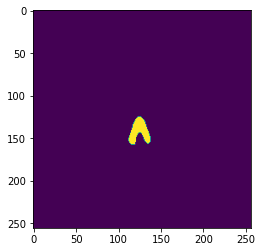

Labelnumber [5], Epoch [661/1000], Step [2/8], Loss: 54.8404,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [662/1000], Step [2/8], Loss: 50.9073,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [663/1000], Step [2/8], Loss: 71.7110,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [664/1000], Step [2/8], Loss: 55.8662,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [665/1000], Step [2/8], Loss: 70.0266,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [666/1000], Step [2/8], Loss: 53.6348,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [667/1000], Step [2/8], Loss: 49.7945,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [668/1000], Step [2/8], Loss: 94.3054,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [669/1000], Step [2/8], Loss: 61.8902,---------------------------------- 

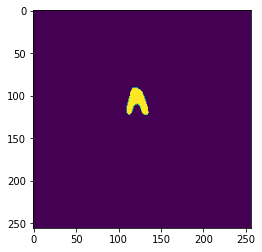

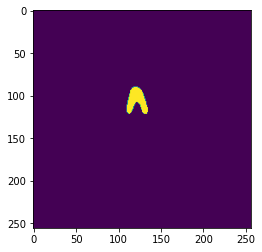

Labelnumber [5], Epoch [671/1000], Step [2/8], Loss: 65.5004,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [672/1000], Step [2/8], Loss: 66.1407,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [673/1000], Step [2/8], Loss: 100.1291,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [674/1000], Step [2/8], Loss: 103.3776,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [675/1000], Step [2/8], Loss: 68.8554,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [676/1000], Step [2/8], Loss: 83.1944,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [677/1000], Step [2/8], Loss: 68.5808,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [678/1000], Step [2/8], Loss: 64.1182,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [679/1000], Step [2/8], Loss: 56.6217,---------------------------------

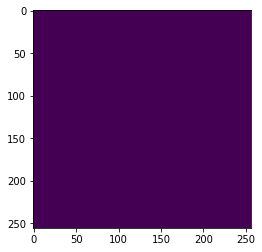

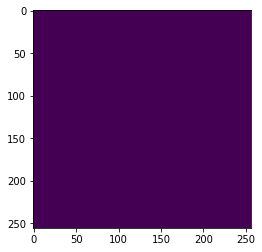

Labelnumber [5], Epoch [681/1000], Step [2/8], Loss: 57.1638,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [682/1000], Step [2/8], Loss: 52.5315,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [683/1000], Step [2/8], Loss: 53.6836,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [684/1000], Step [2/8], Loss: 47.1760,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [685/1000], Step [2/8], Loss: 52.9680,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [686/1000], Step [2/8], Loss: 59.7993,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [687/1000], Step [2/8], Loss: 55.0941,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [688/1000], Step [2/8], Loss: 67.0944,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [689/1000], Step [2/8], Loss: 60.4345,---------------------------------- 

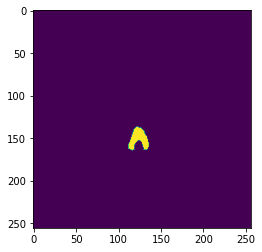

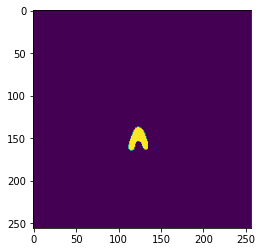

Labelnumber [5], Epoch [691/1000], Step [2/8], Loss: 58.5789,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [692/1000], Step [2/8], Loss: 55.4214,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [693/1000], Step [2/8], Loss: 57.3348,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [694/1000], Step [2/8], Loss: 51.5977,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [695/1000], Step [2/8], Loss: 74.0433,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [696/1000], Step [2/8], Loss: 75.8918,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [697/1000], Step [2/8], Loss: 87.9906,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [698/1000], Step [2/8], Loss: 62.0740,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [699/1000], Step [2/8], Loss: 60.3641,---------------------------------- 

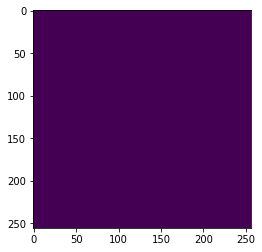

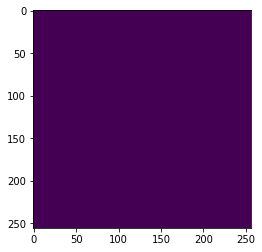

Labelnumber [5], Epoch [701/1000], Step [2/8], Loss: 57.1302,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [702/1000], Step [2/8], Loss: 53.0514,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [703/1000], Step [2/8], Loss: 52.4601,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [704/1000], Step [2/8], Loss: 53.9707,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [705/1000], Step [2/8], Loss: 49.0897,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [706/1000], Step [2/8], Loss: 66.4377,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [707/1000], Step [2/8], Loss: 56.6031,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [708/1000], Step [2/8], Loss: 63.6345,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [709/1000], Step [2/8], Loss: 58.9277,---------------------------------- 

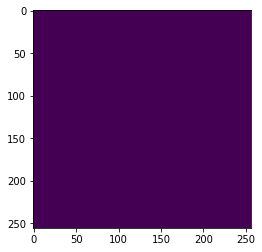

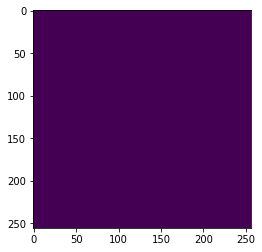

Labelnumber [5], Epoch [711/1000], Step [2/8], Loss: 71.6962,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [712/1000], Step [2/8], Loss: 53.5529,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [713/1000], Step [2/8], Loss: 54.4423,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [714/1000], Step [2/8], Loss: 51.8742,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [715/1000], Step [2/8], Loss: 57.1240,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [716/1000], Step [2/8], Loss: 48.1394,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [717/1000], Step [2/8], Loss: 53.9342,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [718/1000], Step [2/8], Loss: 57.2308,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [719/1000], Step [2/8], Loss: 68.3278,---------------------------------- 

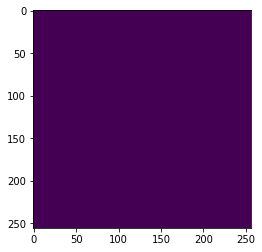

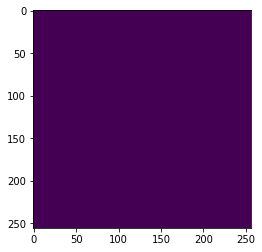

Labelnumber [5], Epoch [721/1000], Step [2/8], Loss: 65.2220,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [722/1000], Step [2/8], Loss: 53.7750,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [723/1000], Step [2/8], Loss: 60.1693,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [724/1000], Step [2/8], Loss: 73.3776,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [725/1000], Step [2/8], Loss: 60.4996,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [726/1000], Step [2/8], Loss: 64.6028,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [727/1000], Step [2/8], Loss: 51.7426,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [728/1000], Step [2/8], Loss: 78.1592,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [729/1000], Step [2/8], Loss: 51.6341,---------------------------------- 

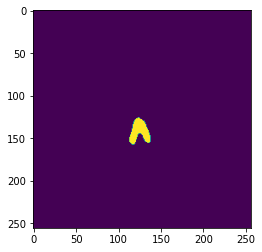

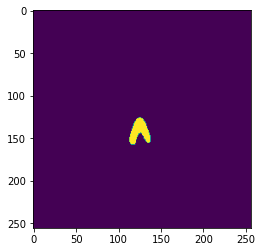

Labelnumber [5], Epoch [731/1000], Step [2/8], Loss: 47.4414,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [732/1000], Step [2/8], Loss: 73.8802,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [733/1000], Step [2/8], Loss: 46.5277,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [734/1000], Step [2/8], Loss: 53.2374,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [735/1000], Step [2/8], Loss: 53.9749,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [736/1000], Step [2/8], Loss: 48.4274,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [737/1000], Step [2/8], Loss: 49.7022,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [738/1000], Step [2/8], Loss: 50.0247,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [739/1000], Step [2/8], Loss: 69.1935,---------------------------------- 

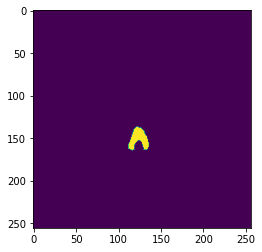

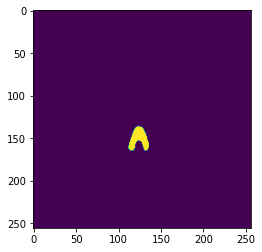

Labelnumber [5], Epoch [741/1000], Step [2/8], Loss: 57.2796,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [742/1000], Step [2/8], Loss: 52.2862,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [743/1000], Step [2/8], Loss: 54.3117,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [744/1000], Step [2/8], Loss: 49.0597,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [745/1000], Step [2/8], Loss: 46.8229,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [746/1000], Step [2/8], Loss: 51.2847,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [747/1000], Step [2/8], Loss: 74.5808,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [748/1000], Step [2/8], Loss: 60.8138,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [749/1000], Step [2/8], Loss: 51.9876,---------------------------------- 

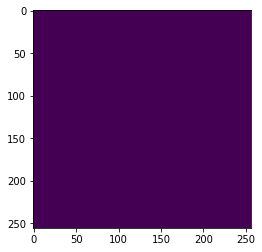

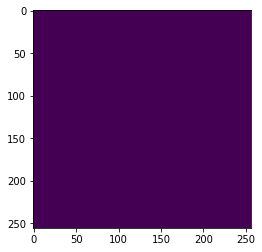

Labelnumber [5], Epoch [751/1000], Step [2/8], Loss: 54.7239,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [752/1000], Step [2/8], Loss: 56.3311,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [753/1000], Step [2/8], Loss: 47.0637,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [754/1000], Step [2/8], Loss: 59.1933,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [755/1000], Step [2/8], Loss: 47.7465,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [756/1000], Step [2/8], Loss: 50.5120,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [757/1000], Step [2/8], Loss: 44.1023,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [758/1000], Step [2/8], Loss: 78.1881,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [759/1000], Step [2/8], Loss: 47.1012,---------------------------------- 

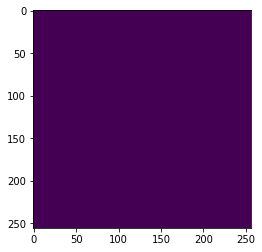

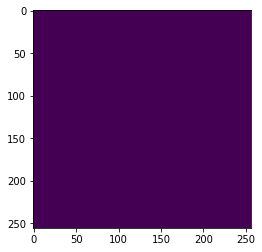

Labelnumber [5], Epoch [761/1000], Step [2/8], Loss: 52.9784,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [762/1000], Step [2/8], Loss: 55.8102,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [763/1000], Step [2/8], Loss: 53.8571,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [764/1000], Step [2/8], Loss: 51.0912,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [765/1000], Step [2/8], Loss: 50.9258,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [766/1000], Step [2/8], Loss: 81.9700,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [767/1000], Step [2/8], Loss: 49.2109,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [768/1000], Step [2/8], Loss: 66.9996,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [769/1000], Step [2/8], Loss: 51.3206,---------------------------------- 

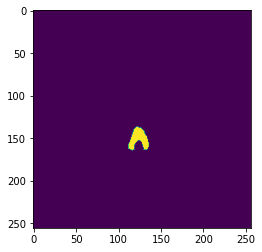

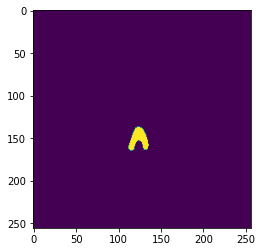

Labelnumber [5], Epoch [771/1000], Step [2/8], Loss: 57.0972,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [772/1000], Step [2/8], Loss: 67.6175,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [773/1000], Step [2/8], Loss: 92.9586,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [774/1000], Step [2/8], Loss: 57.0992,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [775/1000], Step [2/8], Loss: 55.4339,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [776/1000], Step [2/8], Loss: 725.5328,---------------------------------- Accuracy: 96.84%
Labelnumber [5], Epoch [777/1000], Step [2/8], Loss: 402.3018,---------------------------------- Accuracy: 99.88%
Labelnumber [5], Epoch [778/1000], Step [2/8], Loss: 306.6947,---------------------------------- Accuracy: 99.88%
Labelnumber [5], Epoch [779/1000], Step [2/8], Loss: 270.2090,-------------------------------

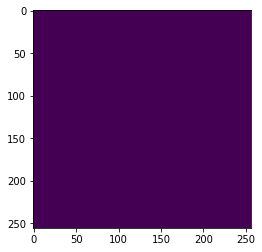

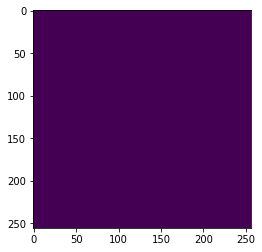

Labelnumber [5], Epoch [781/1000], Step [2/8], Loss: 170.8281,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [782/1000], Step [2/8], Loss: 116.0866,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [783/1000], Step [2/8], Loss: 96.7016,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [784/1000], Step [2/8], Loss: 105.4711,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [785/1000], Step [2/8], Loss: 104.8562,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [786/1000], Step [2/8], Loss: 76.9868,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [787/1000], Step [2/8], Loss: 79.9534,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [788/1000], Step [2/8], Loss: 63.8279,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [789/1000], Step [2/8], Loss: 65.4609,-------------------------------

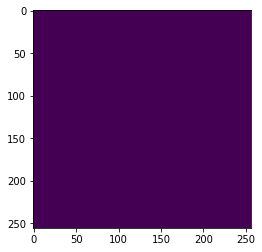

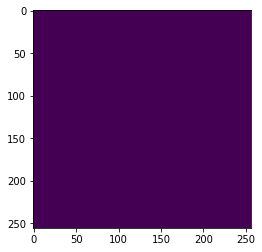

Labelnumber [5], Epoch [791/1000], Step [2/8], Loss: 76.8441,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [792/1000], Step [2/8], Loss: 68.7352,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [793/1000], Step [2/8], Loss: 53.2506,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [794/1000], Step [2/8], Loss: 54.2943,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [795/1000], Step [2/8], Loss: 82.4722,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [796/1000], Step [2/8], Loss: 63.0686,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [797/1000], Step [2/8], Loss: 69.8041,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [798/1000], Step [2/8], Loss: 75.2555,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [799/1000], Step [2/8], Loss: 81.7757,---------------------------------- 

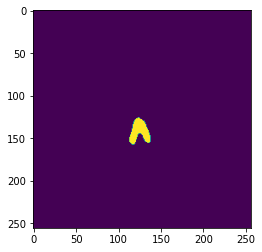

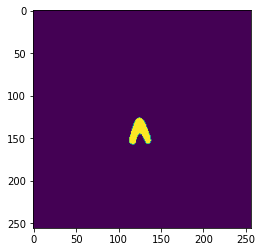

Labelnumber [5], Epoch [801/1000], Step [2/8], Loss: 60.6073,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [802/1000], Step [2/8], Loss: 90.7762,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [803/1000], Step [2/8], Loss: 80.6583,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [804/1000], Step [2/8], Loss: 72.6219,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [805/1000], Step [2/8], Loss: 57.0844,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [806/1000], Step [2/8], Loss: 76.2682,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [807/1000], Step [2/8], Loss: 51.1214,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [808/1000], Step [2/8], Loss: 55.3557,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [809/1000], Step [2/8], Loss: 60.4162,---------------------------------- 

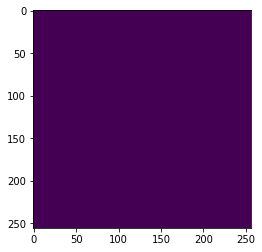

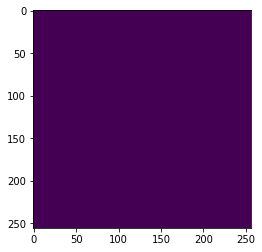

Labelnumber [5], Epoch [811/1000], Step [2/8], Loss: 161.3260,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [812/1000], Step [2/8], Loss: 124.5331,---------------------------------- Accuracy: 99.97%
Labelnumber [5], Epoch [813/1000], Step [2/8], Loss: 99.4075,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [814/1000], Step [2/8], Loss: 125.8437,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [815/1000], Step [2/8], Loss: 90.7627,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [816/1000], Step [2/8], Loss: 84.1409,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [817/1000], Step [2/8], Loss: 67.6191,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [818/1000], Step [2/8], Loss: 85.2621,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [819/1000], Step [2/8], Loss: 80.5438,--------------------------------

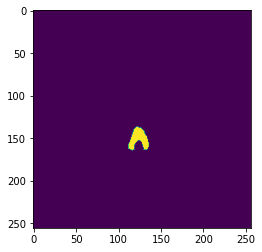

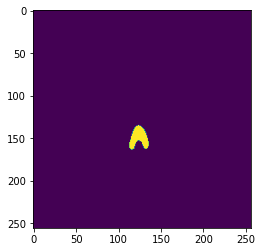

Labelnumber [5], Epoch [821/1000], Step [2/8], Loss: 67.0780,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [822/1000], Step [2/8], Loss: 61.9720,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [823/1000], Step [2/8], Loss: 52.3897,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [824/1000], Step [2/8], Loss: 58.0870,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [825/1000], Step [2/8], Loss: 93.9081,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [826/1000], Step [2/8], Loss: 77.3182,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [827/1000], Step [2/8], Loss: 64.6077,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [828/1000], Step [2/8], Loss: 96.3285,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [829/1000], Step [2/8], Loss: 71.1368,---------------------------------- 

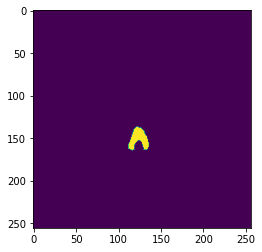

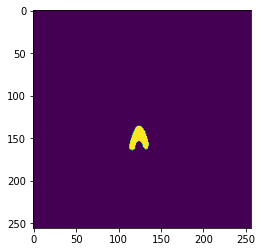

Labelnumber [5], Epoch [831/1000], Step [2/8], Loss: 52.1592,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [832/1000], Step [2/8], Loss: 60.0052,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [833/1000], Step [2/8], Loss: 61.3087,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [834/1000], Step [2/8], Loss: 58.2588,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [835/1000], Step [2/8], Loss: 57.5442,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [836/1000], Step [2/8], Loss: 50.4459,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [837/1000], Step [2/8], Loss: 85.3130,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [838/1000], Step [2/8], Loss: 50.0364,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [839/1000], Step [2/8], Loss: 55.2023,---------------------------------- 

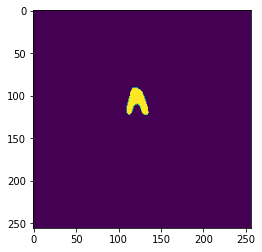

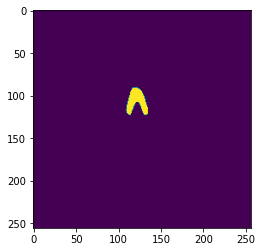

Labelnumber [5], Epoch [841/1000], Step [2/8], Loss: 48.7723,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [842/1000], Step [2/8], Loss: 58.3849,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [843/1000], Step [2/8], Loss: 53.3199,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [844/1000], Step [2/8], Loss: 53.5834,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [845/1000], Step [2/8], Loss: 57.6694,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [846/1000], Step [2/8], Loss: 47.9197,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [847/1000], Step [2/8], Loss: 45.7778,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [848/1000], Step [2/8], Loss: 56.0683,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [849/1000], Step [2/8], Loss: 42.9278,---------------------------------- 

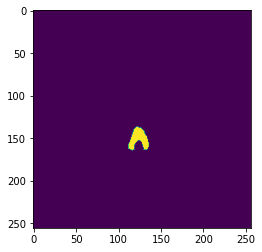

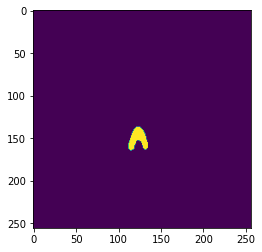

Labelnumber [5], Epoch [851/1000], Step [2/8], Loss: 55.8619,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [852/1000], Step [2/8], Loss: 55.3944,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [853/1000], Step [2/8], Loss: 64.7819,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [854/1000], Step [2/8], Loss: 45.0908,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [855/1000], Step [2/8], Loss: 40.5933,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [856/1000], Step [2/8], Loss: 49.8460,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [857/1000], Step [2/8], Loss: 43.1473,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [858/1000], Step [2/8], Loss: 47.6257,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [859/1000], Step [2/8], Loss: 53.8295,---------------------------------- 

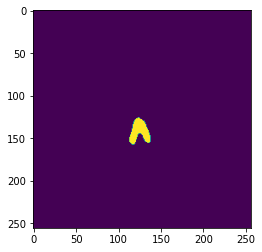

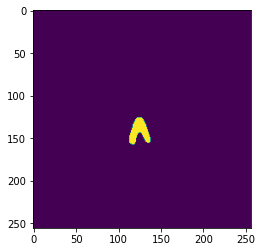

Labelnumber [5], Epoch [861/1000], Step [2/8], Loss: 59.5100,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [862/1000], Step [2/8], Loss: 47.8140,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [863/1000], Step [2/8], Loss: 48.3667,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [864/1000], Step [2/8], Loss: 46.1441,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [865/1000], Step [2/8], Loss: 47.6026,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [866/1000], Step [2/8], Loss: 51.4569,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [867/1000], Step [2/8], Loss: 45.8738,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [868/1000], Step [2/8], Loss: 49.5273,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [869/1000], Step [2/8], Loss: 49.5932,---------------------------------- 

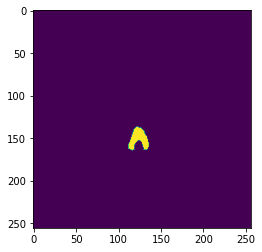

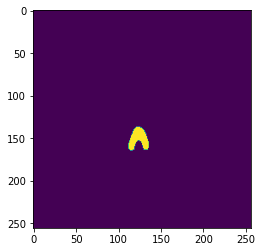

Labelnumber [5], Epoch [871/1000], Step [2/8], Loss: 65.6216,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [872/1000], Step [2/8], Loss: 65.9345,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [873/1000], Step [2/8], Loss: 54.7303,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [874/1000], Step [2/8], Loss: 70.9605,---------------------------------- Accuracy: 99.98%
Labelnumber [5], Epoch [875/1000], Step [2/8], Loss: 57.9893,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [876/1000], Step [2/8], Loss: 59.9966,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [877/1000], Step [2/8], Loss: 62.4563,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [878/1000], Step [2/8], Loss: 59.0717,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [879/1000], Step [2/8], Loss: 50.6317,---------------------------------- 

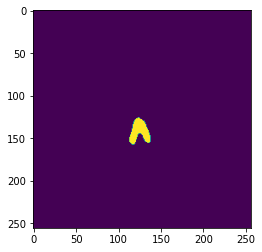

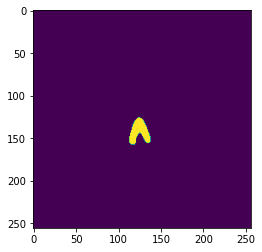

Labelnumber [5], Epoch [881/1000], Step [2/8], Loss: 45.0139,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [882/1000], Step [2/8], Loss: 49.5026,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [883/1000], Step [2/8], Loss: 74.0438,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [884/1000], Step [2/8], Loss: 72.5848,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [885/1000], Step [2/8], Loss: 49.4655,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [886/1000], Step [2/8], Loss: 51.1001,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [887/1000], Step [2/8], Loss: 49.7467,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [888/1000], Step [2/8], Loss: 41.1634,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [889/1000], Step [2/8], Loss: 43.9421,---------------------------------- 

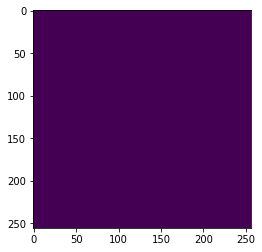

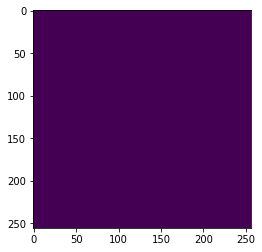

Labelnumber [5], Epoch [891/1000], Step [2/8], Loss: 47.5486,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [892/1000], Step [2/8], Loss: 48.3479,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [893/1000], Step [2/8], Loss: 39.2418,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [894/1000], Step [2/8], Loss: 41.3851,---------------------------------- Accuracy: 99.99%
Labelnumber [5], Epoch [895/1000], Step [2/8], Loss: 49.7242,---------------------------------- Accuracy: 99.99%


In [ ]:
# BeeBrain Dataset and Dataloader
import matplotlib.pyplot as plt

#train_dataset = BeeDataset(train_data_path, img_transforms)
for labelnumber in range(1,10):
    labelnumber = 5
    model = UNet()

    if torch.cuda.is_available():
        device = torch.device("cuda") 
        torch.cuda.init()
    else:
        device = torch.device("cpu")
    #device = torch.device("cpu")
    model.to(device)

    ## Dataset und Loader
    train_dataset = BeeDataset_2class(train_data_path, img_transforms, labelclass = labelnumber)
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle = True, num_workers = 2)
    ##


    ## weightberechnung außerhalb der loop geht nicht, weil die labels noch nicht geladen
    #backgroundweight =1/(len(label[labels==0])) # 1/(backgroundpixel)
    #classweight = 1/(len(label[labels==labelnumber]))  # 1/(classpixel)
    ##

    ## Loss and optimizer
    #criterion = nn.CrossEntropyLoss(weight = torch.tensor([1,10000], dtype = torch.float).cuda()) # 1/class_size is a typical choice for weight
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay = 0.1)
    ##


    # Train the model
    total_step = len(train_loader) # OPTIONAL
    # loss_list to plot our progress
    loss_list = [] # OPTIONAL
    # acc list to plot our accuracy
    acc_list = [] # OPTIONAL
    for epoch in range(num_epochs):
        # goes through train loader -> gives back images and labels
        for i, (images, labels) in enumerate(train_loader):
            labelnum = labels.unique()[labelnumber] ## wegen normalisierung sind labels 0 bis 0,999 statt 0-9
            labels[labels!=labelnum] = 0
            labels[labels==labelnum] = 1
            ## Weight Berechnung für jedes Bild (Lossfunction muss auch jedes mal neu geladen werden aber macht kaum was aus)
            backgroundweight =1/(len(labels[labels==0])) # 1/(backgroundpixel) # alles außer die klasse als background
            classweight = 1/(len(labels[labels==1]))  # 1/(classpixel) # die klasse
            
            
            # Loss and optimizer
            criterion1 = nn.CrossEntropyLoss(weight = torch.tensor([backgroundweight,classweight], dtype = torch.float).cuda()) # 1/class_size is a typical choice for weight
            criterion2 = DiceLoss(weight=torch.tensor((1/backgroundweight)/(1/classweight)))
            ##
            criterion = CombinedLoss(criteria= [criterion1, criterion2], weight= [0.5,0.5])

            labels = labels.to(device, dtype = torch.long)
            images = images.to(device)#.half() # half for 16 bit in 16 bit model
            # images go through forward of model
            
            outputs = model(images)
            _, predicted = torch.max(input = outputs.data, dim = 1)

            # model output and labels go through Loss function
            #outputs = outputs.float() ## required back to 32bit for loss?
            loss = criterion1(outputs, labels)*2 + criterion2(outputs, labels)
            #loss = dice_loss(outputs,labels)
            # add result to loss list
            loss_list.append(loss.item())  # OPTIONAL for training, only for plotting
            
            # Backprop and perform Adam optimisation
            
            # gradients are zeroed with zero_grad - what gradients? why zeroed?
            # back propagation on calculated loss
            optimizer.zero_grad()

            loss.backward()
            # optimizer is used -> does it know automatically what to optimize? which data to use? weights in model.parameters!
            optimizer.step()

            ## ACCURACY ONLY FOR TRACKING -> essentially OPTIONAL for training
            
            # Track the accuracy ( number of correctly predicted / number of inputs = batch size)
            # total number of outputs 100 because batch size is 100
            total = labels.size(0)
            # outputs are 10 numbers 0-9 each representing 1 digit, max takes the most probably calculated
            # _ = values which is the number probability 0.25 for 25% , predicted = indices which are 
            # the most probable numbers ( with 10 outputs, the indices are exactly 0-9)
            #_, predicted = torch.max(input = outputs.data, dim = 1)#[0,0,:,:,:]
            predicted = predicted[0,:,:,:]
            
            ## calculates, how many numbers are correct. output is tensor, item() converts it to int/float
            gesamt = len(predicted.flatten())
            correct = len(predicted.flatten()[(predicted.flatten().cpu() == labels.flatten().cpu())])
            accuracy = correct/gesamt*100
            ##

            ##alternative accuracy (nur accuracy von der labelclass)
            #gesamt = len(labels[labels==labelnumber])
            #correct = len(predicted.flatten()[(predicted[labels==labelnumber].flatten().cpu() == labels[labels==labelnumber].flatten().cpu())])
            #accuracy = correct/gesamt*100
            ##

            #correct = (predicted == labels).sum().item()
            # appends to acc list the number of correct ones / total ones == accuracy in %
            acc_list.append(correct / total)

            # PRINTOUT -> optional
            
            ## macht die ausgabe jeden 100sten schritt (wenn der rest von step+1 / 100 = 0 ist)
            if ((epoch + 1) % 1 == 0) and i == 1:
                ## in the {} werden die argumente von .format eingefügt. ":.2f" gibt die zahl der nachkommerstellen an
                print('Labelnumber [{}], Epoch [{}/{}], Step [{}/{}], Loss: {:.4f},---------------------------------- Accuracy: {:.2f}%'
                    .format(labelnumber, epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                            accuracy))
            ## 

            ##Zwischenspeicherung des models alle 100 epochen
            if ((epoch+1) % 100 == 0) and i ==1:
                print("saving model")
                torch.save(model.state_dict(), "/content/drive/My Drive/BeeBrain/BeeBrain_model7von8_labelnumber_"+str(labelnumber)+".ckpt")
            ##

            ##Zwischenstand plotten alle 10 Epochen
            if ((epoch+1) % 10 == 0) and i ==1:
                print("--- Zwischenstand ---")
                plt.imshow(labels.cpu()[0,:,:,:][24])
                plt.show()
                plt.imshow(predicted.cpu()[24])
                plt.show()
                
    torch.save(model.state_dict(), "/content/drive/My Drive/BeeBrain/BeeBrain_model7von8_labelnumber_"+str(labelnumber)+".ckpt")

In [ ]:
#Liste mit Loss speichern
#Liste mit Dice Score speichern
#Alle 100 Epochen Zwischenspeicherung Seperat -> Später beste rausnehmen
#Alle 100 Epochen Validieren und ergebnis speichern

In [ ]:
## dice score
#A sample code segment here for your reference. Please note that you need to replace k with your desired cluster since you are using k-means. 
k=1
dice = np.sum(seg[gt==k])*2.0 / (np.sum(seg) + np.sum(gt))

print 'Dice similarity score is {}'.format(dice)

In [ ]:
def dice_coef2(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    union = np.sum(y_true_f) + np.sum(y_pred_f)
    if union==0: return 1
    intersection = np.sum(y_true_f * y_pred_f)
    return 2. * intersection / union

In [ ]:
for i in range(1,64):
    print("label")
    plt.imshow(labels.cpu()[0,:,:,:][i])
    plt.show()
    print("predicted")
    plt.imshow(predicted.cpu()[i])
    plt.show()

label


RuntimeError: ignored

In [ ]:
print(labels.unique())
labels.to(device, dtype = torch.long).unique()

RuntimeError: ignored

In [ ]:
torch.save(model.state_dict(), "/content/drive/My Drive/BeeBrain/BeeBrain_model7von8_labelnumber_"+str(labelnumber)+".ckpt")

In [ ]:
labels.unique()

In [ ]:
# accuracy -> flatten output und labels -> zähle richtige -> richtige/gesamt*100
# prediction sollte aus 0/1 bestehen -> nehme nur 1 values und ersetze die entsprechenden im gesamtbild
# predicted[predicted==1]
# predictedgesamt[idx] = predictedmodel[predictedmodel==1]

In [ ]:
### Test Model ###

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import torch
from collections import OrderedDict
import numpy as np
import torch.nn as nn
from math import floor
import matplotlib.pyplot as plt

from skimage import io
#for i in range(0,10):
i = 1
model = UNet().to("cuda")
model.load_state_dict(torch.load("/content/drive/My Drive/BeeBrain/BeeBrain_model7von8_labelnumber_"+str(i)+".ckpt"))
model.eval()
#model = torch.load("/content/drive/My Drive/BeeBrain/BeeBrain_model7von8_labelnumber_"+str(i)+".ckpt")
#model.eval()
#print(model)
image = io.imread(("/content/drive/My Drive/BeeBrain/tiny_testTr/tiny_120920176.tif"))
label = io.imread(("/content/drive/My Drive/BeeBrain/tiny_testTr/new_tiny_label120920176.tif"))
#image = io.imread(("/content/drive/My Drive/BeeBrain/tiny_imagesTr/tiny_060920171.tif"))
#label = io.imread(("/content/drive/My Drive/BeeBrain/tiny_labelsTr/new/new_tiny_label060920171.tif"))

image = np.reshape(image, (1,1,image.shape[0],image.shape[1],image.shape[2]))
image = torch.tensor(image, dtype =torch.float).to("cuda")
output = model(image)
label = torch.tensor(label)
print(np.unique(label))
_, predicted = torch.max(input = output.data, dim = 1) # nimm für jeden wert die höhere wahrscheinlichkeit
predicted = predicted[0,:,:,:] # erste leere dimension rausnehmen der einfacherhalber
pred = np.array(predicted.cpu()) # als np auf cpu fürs plotten

# zum maskieren für jede maske
predlabel = torch.tensor(np.zeros((64,256,256)), device="cuda") # leeren tensor erstellen um masken darauf anzuwenden
correct = (predicted == label.to("cuda")).sum().item()  # die predictions rausnehmen -> besser mit sigmoid später
print(label.shape)
print(predicted.shape)
print(predicted.unique())
predlabel[(predicted==0)] = 10 ## allen werten wo in predicted = 0 ist, einen wert zuweisen ( maskieren)

# accuracy richtig berechnen
gesamt = len(predicted.flatten())
correct = len(predicted.flatten()[(predicted.flatten().cpu() == label.flatten().cpu())])
accuracy = correct/gesamt*100
print(accuracy)

[0 1 2 3 4 5 6 7 8 9]
torch.Size([64, 256, 256])
torch.Size([64, 256, 256])
tensor([0, 1], device='cuda:0')
0.39005279541015625


In [ ]:
predlabel.unique()

tensor([ 0., 10.], device='cuda:0', dtype=torch.float64)

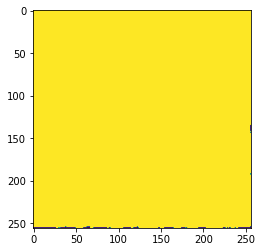

In [ ]:
 # the most probable numbers ( with 10 outputs, the indices are exactly 0-9)
# calculates, how many numbers are correct. output is tensor, item() converts it to int/float
#correct = (predicted == labels).sum().item()
frame = 26
plt.imshow(pred[frame,:,:])

torch.Size([64, 256, 256])

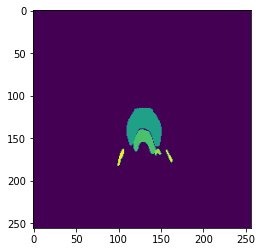

In [ ]:

plt.imshow(label[frame])
label.shape

In [ ]:
# verhaltnis berechnen für weights
a= 1/((len(label[label==1]))/len(label.flatten()))
b = 1/(1-(len(label[label==1]))/len(label.flatten()))
c = 1/len(label[label==1])
d =1/len(label[label==0])
print(a/b)
print(c/d)

11780.752808988764
11676.103932584268
